# Data Types

When reading in a data set, pandas will try to guess the data type of each column like float, integer, datettime, bool, etc. In Pandas, strings are called "object" dtypes. 

However, Pandas does not always get this right. That was the issue with the World Bank projects data. Hence, the dtype was specified as a string:
```
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
```

Run the code cells below to read in the indicator and projects data. Then run the following code cell to see the dtypes of the indicator data frame.

In [1]:
# Run this code cell

import pandas as pd

# read in the population data and drop the final column
df_indicator = pd.read_csv('population_data.csv', skiprows=4)
df_indicator.drop(['Unnamed: 62'], axis=1, inplace=True)

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

In [2]:
# Run this code cell 
df_indicator.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
Length: 62, dtype: object

In [3]:
df_indicator.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0


These results look reasonable. Country Name, Country Code, Indicator Name and Indicator Code were all read in as strings. The year columns, which contain the population data, were read in as floats.

# Exercise 1

Since the population indicator data was read in correctly, you can run calculations on the data. In this first exercise, sum the populations of the United States, Canada, and Mexico by year.

In [4]:
# TODO: Calculate the population sum by year for Canada,
#       the United States, and Mexico.

# the keepcol variable makes a list of the column names to keep. You can use this if you'd like
keepcol = ['Country Name']
for i in range(1960, 2018, 1):
    keepcol.append(str(i))

# TODO: In the df_nafta variable, store a data frame that only contains the rows for 
#      Canada, United States, and Mexico.
df_nafta = df_indicator[df_indicator['Country Code'].isin(['USA','CAN','MEX'])]


# TODO: Calculate the sum of the values in each column in order to find the total population by year.
# You can use the keepcol variable if you want to control which columns get outputted
df_nafta[keepcol].sum()

Country Name    CanadaMexicoUnited States
1960                          2.36754e+08
1961                          2.41356e+08
1962                          2.45802e+08
1963                          2.50146e+08
1964                          2.54478e+08
1965                          2.58604e+08
1966                          2.62619e+08
1967                          2.66554e+08
1968                          2.70344e+08
1969                          2.74128e+08
1970                          2.78406e+08
1971                          2.83025e+08
1972                          2.87368e+08
1973                          2.91559e+08
1974                          2.95716e+08
1975                          3.00054e+08
1976                          3.04177e+08
1977                          3.08381e+08
1978                           3.1266e+08
1979                          3.17042e+08
1980                          3.21179e+08
1981                          3.25358e+08
1982                          3.29

In [5]:
df_nafta

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
33,Canada,CAN,"Population, total",SP.POP.TOTL,17909009.0,18271000.0,18614000.0,18964000.0,19325000.0,19678000.0,...,33245773.0,33628571.0,34005274.0,34342780.0,34750545.0,35152370.0,35535348.0,35832513.0,36264604.0,36708083.0
152,Mexico,MEX,"Population, total",SP.POP.TOTL,38174112.0,39394126.0,40649588.0,41939880.0,43264272.0,44623043.0,...,113661809.0,115505228.0,117318941.0,119090017.0,120828307.0,122535969.0,124221600.0,125890949.0,127540423.0,129163276.0
249,United States,USA,"Population, total",SP.POP.TOTL,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,...,304093966.0,306771529.0,309338421.0,311644280.0,313993272.0,316234505.0,318622525.0,321039839.0,323405935.0,325719178.0


# Exercise 2

Now, run the code cell below to look at the dtypes for the projects data set. They should all be "object" types, ie strings, because that's what was specified in the code when reading in the csv file. As a reminder, this was the code:
```python
df_projects = pd.read_csv('../data/projects_data.csv', dtype=str)
```

In [6]:
# Run this code cell
df_projects.dtypes

id                          object
regionname                  object
countryname                 object
prodline                    object
lendinginstr                object
lendinginstrtype            object
envassesmentcategorycode    object
supplementprojectflg        object
productlinetype             object
projectstatusdisplay        object
status                      object
project_name                object
boardapprovaldate           object
board_approval_month        object
closingdate                 object
lendprojectcost             object
ibrdcommamt                 object
idacommamt                  object
totalamt                    object
grantamt                    object
borrower                    object
impagency                   object
url                         object
projectdoc                  object
majorsector_percent         object
sector1                     object
sector2                     object
sector3                     object
sector4             

Many of these columns should be strings, so there's no problem; however, a few columns should be other data types. For example, `boardapprovaldate` should be a datettime and `totalamt` should be an integer. You'll learn about datetime formatting in the next part of the lesson. For this exercise, focus on the 'totalamt' and 'lendprojectcost' columns. Run the code cell below to see what that data looks like

In [7]:
# Run this code cell
df_projects[['totalamt', 'lendprojectcost']].head()

,totalamt,lendprojectcost
0,0,"500,000"
1,"200,000,000","200,000,000"
2,"58,330,000","50,000,000"
3,"20,000,000","50,000,000"
4,"100,000,000","100,000,000"


In [8]:
# Run this code cell to take the sum of the total amount column
df_projects['totalamt'].sum()

'0200,000,00058,330,00020,000,000100,000,000500,000,000350,000,000225,000,000125,000,000329,900,000200,000,000400,000,0000150,000,0000389,000,0000530,000,000350,000,000202,000,000300,000,000500,000,000493,060,000175,000,0000230,000,00080,000,000400,000,000130,000,00030,000,00035,000,0000250,000,000200,000,000400,000,000110,000,000150,000,00074,000,000118,000,000465,000,000050,000,00090,000,000100,000,000130,000,00010,000,000460,600,000100,000,000700,000,00030,000,000280,000,00040,000,000300,000,00090,000,000150,000,000150,000,00043,000,000100,000,00015,000,00015,000,000012,000,00030,000,000100,000,000250,000,000200,000,000150,000,00025,000,000500,000,000122,100,00020,000,00007,390,000000050,000,00075,000,00060,000,00025,000,00015,000,00000300,000,00025,000,00011,000,0009,000,000130,000,000140,000,000100,000,000200,000,00070,000,000140,000,00020,000,000188,000,000200,000,000500,000,00014,200,00040,000,000150,000,000003,550,000600,000,000400,000,0000150,000,0006,000,00012,000,000100,000,

What just happened? Pandas treated the totalamts like strings. In Python, adding strings concatenates the strings together.

There are a few ways to remedy this. When using pd.read_csv(), you could specify the column type for every column in the data set. The pd.read_csv() dtype option can accept a dictionary mapping each column name to its data type. You could also specify the `thousands` option with `thousands=','`. This specifies that thousands are separated by a comma in this data set. 

However, this data is somewhat messy, contains missing values, and has a lot of columns. It might be faster to read in the entire data set with string types and then convert individual columns as needed. For this next exercise, convert the `totalamt` column from a string to an integer type.

In [9]:
# TODO: Convert the totalamt column from a string to a float and save the results back into the totalamt column

# Step 1: Remove the commas from the 'totalamt' column
# HINT: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.str.replace.html
df_projects['totalamt'] = df_projects['totalamt'].apply(lambda x: ''.join(x.split(',')))
# Step 2: Convert the 'totalamt' column from an object data type (ie string) to an integer data type.
# HINT: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.to_numeric.html
df_projects['totalamt'] = df_projects['totalamt'].astype(int)



# Conclusion

With messy data, you might find it easier to read in everything as a string; however, you'll sometimes have to convert those strings to more appropriate data types. When you output the dtypes of a dataframe, you'll generally see these values in the results:
* float64
* int64
* bool
* datetime64
* timedelta
* object

where timedelta is the difference between two datetimes and object is a string. As you've seen here, you sometimes need to convert data types from one type to another type. Pandas has a few different methods for converting between data types, and here are link to the documentation:

* [astype](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.astype.html#pandas.DataFrame.astype)
* [to_datetime](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_datetime.html#pandas.to_datetime)
* [to_numeric](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_numeric.html#pandas.to_numeric)
* [to_timedelta](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.to_timedelta.html#pandas.to_timedelta)

# Parsing Dates

Another common data transformation involves parsing dates. Parsing generally means that you start with a string and then transform that string into a different data type. In this case, that means taking a date in the format of a string and transforming the string into a date type. Run the next cell to see an example.

In [10]:
import pandas as pd
parsed_date = pd.to_datetime('January 1st, 2017')
parsed_date

Timestamp('2017-01-01 00:00:00')

In [11]:
parsed_date.month

1

In [12]:
parsed_date.year

2017

In [13]:
parsed_date.second

0

Sometimes date string are formatted in unexpected ways. For example, in the United States, dates are given with the month first and then the day. That is what pandas expects by default. However, some countries write the date with the day first and then the month. Run the next three examples to see Panda's default behavior and how you can specify the date formatting.

In [14]:
parsed_date = pd.to_datetime('5/3/2017 5:30')
parsed_date.month

5

In [15]:
parsed_date = pd.to_datetime('3/5/2017 5:30', format='%d/%m/%Y %H:%M')
parsed_date.month

5

In [16]:
parsed_date = pd.to_datetime('5/3/2017 5:30', format='%m/%d/%Y %H:%M')
parsed_date.month

5

The formatting abbreviations are actually part of the python standard. You can see examples at [this link](http://strftime.org/).

# Part 1 - Practice Parsing Dates

Run the code cells below to import the World Bank projects data. The last line of the code outputs all of the column names in the data frame.

In [17]:
# Run this code cell. Read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)
df_projects.columns

Index(['id', 'regionname', 'countryname', 'prodline', 'lendinginstr',
       'lendinginstrtype', 'envassesmentcategorycode', 'supplementprojectflg',
       'productlinetype', 'projectstatusdisplay', 'status', 'project_name',
       'boardapprovaldate', 'board_approval_month', 'closingdate',
       'lendprojectcost', 'ibrdcommamt', 'idacommamt', 'totalamt', 'grantamt',
       'borrower', 'impagency', 'url', 'projectdoc ', 'majorsector_percent ',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
       'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
       'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
       'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
       'mjtheme4name', 'mjtheme5name', 'location', 'GeoLocID', 'GeoLocName',
       'Latitude', 'Longitude', 'Country'],
      dtype='object')

Notice there are three columns associated with dates: boardapprovaldate, board_approval_month, and closingdate. Run the code cell below to see what these values look like.

In [18]:
# Run this code cell
df_projects.head(15)[['boardapprovaldate', 'board_approval_month', 'closingdate']]

,boardapprovaldate,board_approval_month,closingdate
0,2018-06-28T00:00:00Z,June,NaN
1,2018-06-28T00:00:00Z,June,2023-12-31T00:00:00Z
2,2018-06-28T00:00:00Z,June,NaN
3,2018-06-27T00:00:00Z,June,2023-06-28T00:00:00Z
4,2018-06-27T00:00:00Z,June,2023-05-31T00:00:00Z
5,2018-06-27T00:00:00Z,June,2019-12-31T00:00:00Z
6,2018-06-27T00:00:00Z,June,2023-10-31T00:00:00Z
7,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z
8,2018-06-27T00:00:00Z,June,2022-12-31T00:00:00Z
9,2018-06-27T00:00:00Z,June,2023-12-31T00:00:00Z


In [19]:
# Use the pandas to_datetime method to convert the boardapprovaldate and 
# closingdate columns into datetime objects.

# TODO: Use the pandas to_datetime method to convert these two columns 
#   (boardapprovaldate, closingdate) into date times.
# HINT: It's easier to do this one column at a time

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])
df_projects['closingdate'] = pd.to_datetime(df_projects['closingdate'])



In [20]:
# Run the code cells below to see how you can access the different parts of the datetime objects
# Series.dt gives access to the datetime object as explained here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html
df_projects['boardapprovaldate'].dt.second

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18243    0.0
18244    0.0
18245    0.0
18246    0.0
18247    0.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [21]:
# Run this code cell to see the output
df_projects['boardapprovaldate'].dt.month

0        6.0
1        6.0
2        6.0
3        6.0
4        6.0
        ... 
18243    3.0
18244    8.0
18245    8.0
18246    8.0
18247    5.0
Name: boardapprovaldate, Length: 18248, dtype: float64

In [22]:
# Run this code to see the output
# weekday represents the day of the week from 0 (Monday) to 6 (Sunday).
df_projects['boardapprovaldate'].dt.weekday

0        3.0
1        3.0
2        3.0
3        2.0
4        2.0
        ... 
18243    3.0
18244    3.0
18245    4.0
18246    3.0
18247    4.0
Name: boardapprovaldate, Length: 18248, dtype: float64

# Part 2 - Create new columns

Now that the boardapprovaldate and closingdates are in datetime formats, create a few new columns in the df_projects data frame:
* approvalyear
* approvalday
* approvalweekday
* closingyear
* closingday
* closingweekday

In [23]:
### 
# TODO create the follwing new columns in the df_projects data frame
#
# approvalyear
# approvalday
# approvalweekday
# closingyear
# closingday
# closingweekday
#
#
###

df_projects['approvalyear'] = df_projects['boardapprovaldate'].dt.year
df_projects['approvalday'] = df_projects['boardapprovaldate'].dt.day
df_projects['approvalweekday'] = df_projects['boardapprovaldate'].dt.weekday
df_projects['closingyear'] = df_projects['closingdate'].dt.year
df_projects['closingday'] = df_projects['closingdate'].dt.day
df_projects['closingweekday'] = df_projects['closingdate'].dt.weekday

# Part 3 (Challenge)

Use what you've practiced in this exercise to make a visualization of year on the x-axis and the sum of the totalamt columns per year on the y-axis. 

You'll first need to clean the totalamt column to get rid of commas and convert the values to numeric. Then you'll need to use pandas' groupby method to sum the totalamt column for each year. 

Finally, you can use the pandas plot() method to output the visualization.

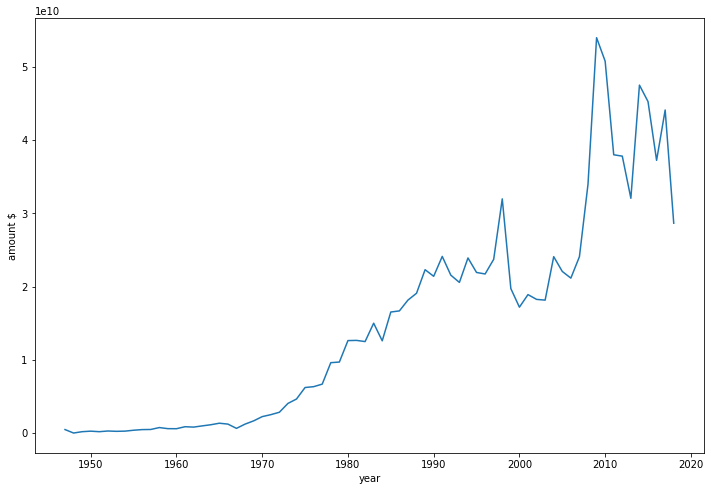

In [24]:
###
# TODO: Make a visualization with year on the x-axis and the sum of the totalamt columns per year on the y-axis
# HINT: The totalamt column is currently a string with commas. For example 100,250,364. You'll need to remove the
#         commas and convert the column to a numeric variable.
# HINT: pandas groupby, sum, and plot methods should also be helpful
####

import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Step 1 - convert the totalamt column from string to numeric. Be sure to remove the commas in this column
df_projects['totalamt'] = df_projects['totalamt'].apply(lambda x : ''.join(x.split(',')))
df_projects['totalamt'] = df_projects['totalamt'].astype(int)

# df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',''))

# TODO: Step 2 - calculate the sum of the totalamt column by year and plot the results with a line plot
df_projects.groupby('approvalyear').totalamt.sum().plot(kind = 'line', figsize = (12,8))
plt.xlabel('year')
plt.ylabel('amount $')
plt.show();




# Conclusion

Parsing dates is a common task data transformation task. This is true not just with pandas but with other data systems like [SQL](http://www-db.deis.unibo.it/courses/TW/DOCS/w3schools/sql/sql_dates.asp.html).

# Encodings

Encodings are a set of rules mapping string characters to their binary representations. Python supports dozens of different encoding as seen here in [this link](https://docs.python.org/3/library/codecs.html#standard-encodings). Because the web was originally in English, the first encoding rules mapped binary code to the English alphabet. 

The English alphabet has only 26 letters. But other languages have many more characters including accents, tildes and umlauts. As time went on, more encodings were invented to deal with languages other than English. The utf-8 standard tries to provide a single encoding schema that can encompass all text.

The problem is that it's difficult to know what encoding rules were used to make a file unless somebody tells you. The most common encoding by far is utf-8. Pandas will assume that files are utf-8 when you read them in or write them out.

Run the code cell below to read in the population data set.

In [25]:
import pandas as pd
df = pd.read_csv('population_data.csv', skiprows=4)

In [26]:
import pandas as pd
df = pd.read_csv('mystery.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte

You should have gotten an error: UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 0: invalid start byte. This means pandas assumed the file had a utf-8 encoding but had trouble reading in the data file.

Your job in the next cell is to figure out the encoding for the mystery.csv file.

In [27]:
# TODO: Figure out what the encoding is of the myster.csv file
# HINT: pd.read_csv('mystery.csv', encoding=?) where ? is the string for an encoding like 'ascii'
# HINT: This link has a list of encodings that Python recognizes https://docs.python.org/3/library/codecs.html#standard-encodings

# Python has a file containing a dictionary of encoding names and associated aliases
# This line imports the dictionary and then creates a set of all available encodings
# You can use this set of encodings to search for the correct encoding
# If you'd like to see what this file looks like, execute the following Python code to see where the file is located
#    from encodings import aliases
#    aliases.__file__

from encodings.aliases import aliases

alias_values = set(aliases.values())

# TODO: iterate through the alias_values list trying out the different encodings to see which one or ones work
# HINT: Use a try - except statement. Otherwise your code will produce an error when reading in the csv file
#       with the wrong encoding.
# HINT: In the try statement, print out the encoding name so that you know which one(s) worked.
fit_list = []
for i in alias_values:

    try:
        df = pd.read_csv('mystery.csv', encoding = i)
        fit_list.append(i)
    except:
        continue

fit_list

['utf_16_be',
 'cp273',
 'utf_16',
 'cp037',
 'cp1026',
 'cp500',
 'utf_16_le',
 'cp1140']

In [28]:
from encodings import aliases
aliases.__file__



'/Users/xuhao3/opt/anaconda3/lib/python3.7/encodings/aliases.py'

# Conclusion

There are dozens of encodings that Python can handle; however, Pandas assumes a utf-8 encoding. This makes sense since utf-8 is very common. However, you will sometimes come across files with other encodings. If you don't know the encoding, you have to search for it.

Note, as always, there is a solution file for this exercise. Go to File->Open.

There is a Python library that can be of some help when you don't know an encoding: chardet. Run the code cells below to see how it works.

In [ ]:
# install the chardet library
!pip install chardet

In [29]:
# import the chardet library
import chardet 

# use the detect method to find the encoding
# 'rb' means read in the file as binary
with open("mystery.csv", 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


# Imputing Data

When a dataset has missing values, you can either remove those values or fill them in. In this exercise, you'll work with World Bank GDP (Gross Domestic Product) data to fill in missing values.

In [30]:
# run this code cell to read in the data set
import pandas as pd
df = pd.read_csv('gdp_data.csv', skiprows=4)
df.drop('Unnamed: 62', axis=1, inplace=True)

In [31]:
# run this code cell to see what the data looks like
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09


In [32]:
# Run this code cell to check how many null values are in the data set
df.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              140
                 ... 
2013               16
2014               17
2015               18
2016               23
2017               30
Length: 62, dtype: int64

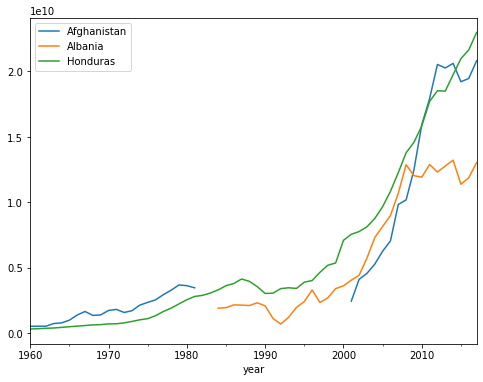

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

# put the data set into long form instead of wide
df_melt = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], var_name='year', value_name='GDP')

# convert year to a date time
df_melt['year'] = pd.to_datetime(df_melt['year'])

def plot_results(column_name):
    # plot the results for Afghanistan, Albania, and Honduras
    fig, ax = plt.subplots(figsize=(8,6))

    df_melt[(df_melt['Country Name'] == 'Afghanistan') | 
            (df_melt['Country Name'] == 'Albania') | 
            (df_melt['Country Name'] == 'Honduras')].groupby('Country Name').plot('year', column_name, legend=True, ax=ax)
    ax.legend(labels=['Afghanistan', 'Albania', 'Honduras'])
    
plot_results('GDP')

Afghanistan and Albania are missing data, which show up as gaps in the results. 

# Exercise - Part 1

Your first task is to calculate mean GDP for each country and fill in missing values with the country mean. This is a bit tricky to do in pandas. Here are a few links that should be helpful:
* https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.groupby.html
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.transform.html
* https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html

In [34]:
df_melt.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,year,GDP
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960-01-01,NaN


In [35]:
# TODO: Use the df_melt dataframe and fill in missing values with a country's mean GDP
# If you aren't sure how to do this, 
# look up something like "how to group data and fill in nan values in pandas" in a search engine
# Put the results in a new column called 'GDP_filled'.

# HINT: You can do this with these methods: groupby(), transform(), a lambda function, fillna(), and mean()

df_melt['GDP_filled'] = df_melt.groupby('Country Name')['GDP'].\
                            apply(lambda col: col.fillna(col.mean()))



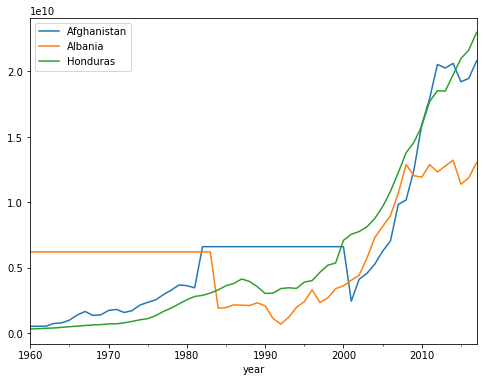

In [36]:
plot_results('GDP_filled')

This is somewhat of an improvement. At least there is no missing data; however, because GDP tends to increase over time, the mean GDP is probably not the best way to fill in missing values for this particular case. Next, try using forward fill to deal with any missing values.

# Excercise - Part 2

Use the fillna forward fill method to fill in the missing data. Here is the [documentation](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.fillna.html). As explained in the course video, forward fill takes previous values to fill in nulls.

The pandas fillna method has a forward fill option. For example, if you wanted to use forward fill on the GDP dataset, you could execute `df_melt['GDP'].fillna(method='ffill')`. However, there are two issues with that code. 
1. You want to first make sure the data is sorted by year
2. You need to group the data by country name so that the forward fill stays within each country

Write code to first sort the df_melt dataframe by year, then group by 'Country Name', and finally use the forward fill method.

In [37]:
# TODO: Use forward fill to fill in missing GDP values
# HINTS: use the sort_values(), groupby(), and fillna() methods
df_melt['GDP_ffill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method = 'ffill')

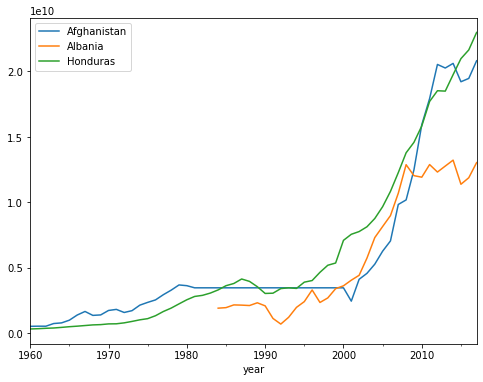

In [38]:
# plot the results
plot_results('GDP_ffill')

This looks better at least for the Afghanistan data; however, the Albania data is still missing values. You can fill in the Albania data using back fill. That is what you'll do next.

# Exercise - Part 3

This part is similar to Part 2, but now you will use backfill. Write code that backfills the missing GDP data.

In [39]:
# TODO: Use back fill to fill in missing GDP values
# HINTS: use the sort_values(), groupby(), and fillna() methods
df_melt['GDP_bfill'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method = 'bfill')



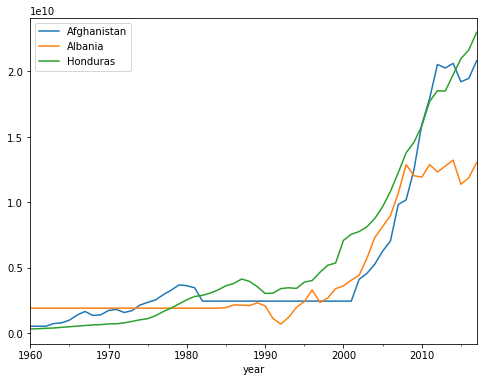

In [40]:
# plot the results
plot_results('GDP_bfill')

# Conclusion 

In this case, the GDP data for all three countries is now complete. Note that forward fill did not fill all the Albania data because the first data entry in 1960 was NaN. Forward fill would try to fill the 1961 value with the NaN value from 1960.

To completely fill the entire GDP data for all countries, you might have to run both forward fill and back fill. Note as well that the results will be slightly different depending on if you run forward fill first or back fill first. Afghanistan, for example, is missing data in the middle of the data set. Hence forward fill and back fill will have slightly different results.

Run this next code cell to see if running both forward fill and back fill end up filling all the GDP NaN values.

In [41]:
# Run forward fill and backward fill on the GDP data
df_melt['GDP_ff_bf'] = df_melt.sort_values('year').groupby('Country Name')['GDP'].fillna(method='ffill').fillna(method='bfill')

# Check if any GDP values are null
df_melt['GDP_ff_bf'].isnull().sum()

0

# Duplicate Data

A data set might have duplicate data: in other words, the same record is represented multiple times. Sometimes, it's easy to find and eliminate duplicate data like when two records are exactly the same. At other times, like what was discussed in the video, duplicate data is hard to spot. 

# Exercise 1

From the World Bank GDP data, count the number of countries that have had a project totalamt greater than 1 billion dollars (1,000,000,000). To get the count, you'll have to remove duplicate data rows.

In [42]:
import pandas as pd

# read in the projects data set and do some basic wrangling 
projects = pd.read_csv('projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])



In [43]:
# TODO: filter the data frame for projects over 1 billion dollars
projects[projects['totalamt'] > 1000000000].id.nunique()


# TODO: count the number of unique countries in the results

44

In [44]:
projects.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG


# Exercise 2 (challenge)

This exercise is more challenging. The projects data set contains data about Yugoslavia, which was an Eastern European country until 1992. Yugoslavia eventually broke up into 7 countries: Bosnia and Herzegovina, Croatia, Kosovo, Macedonia, Montenegro, Serbia, and Slovenia.

But the projects dataset has some ambiguity in how it treats Yugoslavia and the 7 countries that came from Yugoslavia. Your task is to find Yugoslavia projects that are probably represented multiple times in the data set.

In [45]:
# TODO: output all projects for the 'Socialist Federal Republic of Yugoslavia'
# HINT: You can use the exact country name or use the pandas str.contains() method 
# to search for Yugoslavia

projects[projects['countryname'].str.contains('Yugoslavia')]


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
11166,P009285,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,A,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11410,P009231,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Sector Investment and Maintenance Loan,IN,B,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11479,P009219,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11694,P009225,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Sector Investment and Maintenance Loan,IN,C,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11695,P009275,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17903,P009137,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17963,P009136,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18175,P009135,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18197,P009134,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yugoslavia officially ended on [April 27th, 1992](https://en.wikipedia.org/wiki/Yugoslavia). 

In the code cell below, filter for projects with a 'boardapprovaldate' prior to April 27th, 1992 **and** with 'countryname' Bosnia and Herzegovina, Croatia, Kosovo, Macedonia, Serbia **or** Slovenia. You'll see there are a total of 12 projects in the data set that match this criteria. Save the results in the republics variable

In [46]:
import datetime

# TODO: filter the projects data set for project boardapprovaldate prior to April 27th, 1992 AND with countryname
#  of either 'Bosnia and Herzegovina', 'Croatia', 'Kosovo', 'Macedonia', 'Serbia', or 'Sovenia'. Store the
#  results in the republics variable

republics = projects[(projects['boardapprovaldate'] < datetime.datetime(1992,4,27,tzinfo=datetime.timezone.utc)) &
                   (projects['countryname'].str.contains('Bosnia') |
                    projects['countryname'].str.contains('Croatia') |
                    projects['countryname'].str.contains('Kosovo') |
                    projects['countryname'].str.contains('Macedonia') |
                    projects['countryname'].str.contains('Serbia') |
                    projects['countryname'].str.contains('Sovenia') |
                    projects['countryname'].str.contains('Montenegro'))]\
                        [['regionname', 'countryname', 'lendinginstr', 'totalamt', 
                          'boardapprovaldate','location','GeoLocID', 'GeoLocName', 
                          'Latitude','Longitude','Country', 'project_name']].sort_values('boardapprovaldate')



#  TODO: so that it's easier to see all the data, keep only these columns:
# ['regionname', 'countryname', 'lendinginstr', 'totalamt', 'boardapprovaldate',
# 'location','GeoLocID', 'GeoLocName', 'Latitude','Longitude','Country', 'project_name']

# TODO: sort the results by boardapprovaldate


# show the results
republics

,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name
13973,Europe and Central Asia,Macedonia,Specific Investment Loan,24000000,1980-02-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture & Agroindustry 2 Project (Macedonia)
13048,Europe and Central Asia,Bosnia and Herzegovina,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13049,Europe and Central Asia,Republic of Croatia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13050,Europe and Central Asia,Macedonia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
12228,Europe and Central Asia,Republic of Croatia,Financial Intermediary Loan,0,1987-03-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,IND.ENERGY EFFIC. I
12061,Europe and Central Asia,Republic of Croatia,Sector Investment and Maintenance Loan,0,1987-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,HIGHWAY SECTOR II
12062,Europe and Central Asia,Republic of Croatia,Sector Investment and Maintenance Loan,0,1987-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,HIGHWAY SECTOR II
12063,Europe and Central Asia,Bosnia and Herzegovina,Sector Investment and Maintenance Loan,0,1987-10-13 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,HIGHWAY SECTOR II
11696,Europe and Central Asia,Republic of Croatia,Specific Investment Loan,28000000,1989-05-23 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Istria Water Supply & Sewerage Project


Are these projects also represented in the data labeled Yugoslavia? In the code cell below, filter for Yugoslavia projects approved between February 1st, 1980 and May 23rd, 1989 which are the minimum and maximum dates in the results above. Store the results in the yugoslavia variable.

The goal is to see if there are any projects represented more than once in the data set.

In [47]:
# TODO: Filter the projects data for Yugoslavia projects between
# February 1st, 1980 and May 23rd, 1989. Store the results in the
# Yugoslavia variable. Keep the same columns as the previous code cell.
# Sort the values by boardapprovaldate

yugoslavia = projects[(projects['boardapprovaldate'] >= datetime.datetime(1980,2,1,tzinfo=datetime.timezone.utc)) &
                      (projects['boardapprovaldate'] <= datetime.datetime(1989,5,23,tzinfo=datetime.timezone.utc)) &
                      (projects['countryname'].str.contains('Yugoslavia'))]\
                                [['regionname', 'countryname', 'lendinginstr', 'totalamt', 
                               'boardapprovaldate', 'location', 'GeoLocID', 'GeoLocName',
                               'Latitude', 'Longitude', 'Country', 'project_name']].sort_values('boardapprovaldate')

# show the results
yugoslavia

,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name
13966,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,86000000,1980-02-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Agriculture Credit Project (03)
13937,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,125000000,1980-03-25 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Highway Project (11)
13773,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,110000000,1980-10-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Credit Project (05)
13706,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,87000000,1981-03-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Morava Regional Development Project (02)
13647,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,34000000,1981-04-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo Railway Project
13629,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,90000000,1981-05-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo Agriculture Development Project
13555,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,80000000,1981-07-14 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Macedonia Agriculture Development Project (03)
13526,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,41000000,1981-11-10 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Kosovo Water Supply Project
13412,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,66000000,1982-04-27 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Credit Project (06)
13402,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,35000000,1982-05-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Bosnia Herzegovina Agriculture Development Pro...


And as a final step, try to see if there are any projects in the republics variable and yugoslavia variable that could be the same project.

There are multiple ways to do that. As a suggestion, find unique dates in the republics variable. Then separately find unique dates in the yugoslavia variable. Concatenate (ie append) the results together. And then count the number of times each date occurs in this list. If a date occurs twice, that means the same boardapprovaldate appeared in both the Yugoslavia data as well as in the republics data.

You should find that there are four suspicious cases:

* July 26th, 1983
* March 31st, 1987
* October 13th, 1987
* May 23rd, 1989

In [48]:
import numpy as np

# TODO: find the unique dates in the republics variable
republic_unique_dates = republics['boardapprovaldate'].unique()

# TODO: find the unique dates in the yugoslavia variable
yugoslavia_unique_dates = yugoslavia['boardapprovaldate'].unique()

# TODO: make a list of the results appending one list to the other
dates = np.append(republic_unique_dates , yugoslavia_unique_dates)

# TODO: print out the dates that appeared twice in the results
unique_dates, count = np.unique(dates, return_counts=True)

for i in range(len(unique_dates)):
    if count[i] == 2:
        print(unique_dates[i])

1983-07-26 00:00:00+00:00
1987-03-31 00:00:00+00:00
1987-10-13 00:00:00+00:00
1989-05-23 00:00:00+00:00


# Conclusion

On July 26th, 1983, for example, projects were approved for Bosnia and Herzegovina, Croatia, Macedonia, Slovenia, and Yugoslavia. The code below shows the projects for that date. You'll notice that Yugoslavia had two projects, one of which was called "Power Transmission Project (03) Energy Managem...". The projects in the other countries were all called "POWER TRANS.III". 

This looks like a case of duplicate data. What you end up doing with this knowledge would depend on the context. For example, if you wanted to get a true count for the total number of projects in the data set, should all of these projects be counted as one project? 

Run the code cell below to see the projects in question.

In [49]:
import datetime

# run this code cell to see the duplicate data
pd.concat([yugoslavia[yugoslavia['boardapprovaldate'] == datetime.datetime(1983, 7, 26,tzinfo=datetime.timezone.utc)], 
                      republics[republics['boardapprovaldate'] == datetime.datetime(1983, 7, 26,tzinfo=datetime.timezone.utc)]
          ])



,regionname,countryname,lendinginstr,totalamt,boardapprovaldate,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,project_name
13046,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Financial Intermediary Loan,70000000,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Credit Project (07)
13047,Europe and Central Asia,Socialist Federal Republic of Yugoslavia,Specific Investment Loan,120000000,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,Power Transmission Project (03) Energy Managem...
13048,Europe and Central Asia,Bosnia and Herzegovina,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13049,Europe and Central Asia,Republic of Croatia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III
13050,Europe and Central Asia,Macedonia,Specific Investment Loan,0,1983-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,POWER TRANS.III


# Dummy Variables Exercise

In this exercise, you'll create dummy variables from the projects data set. The idea is to transform categorical data like this:

| Project ID | Project Category |
|------------|------------------|
| 0          | Energy           |
| 1          | Transportation   |
| 2          | Health           |
| 3          | Employment       |

into new features that look like this:

| Project ID | Energy | Transportation | Health | Employment |
|------------|--------|----------------|--------|------------|
| 0          | 1      | 0              | 0      | 0          |
| 1          | 0      | 1              | 0      | 0          |
| 2          | 0      | 0              | 1      | 0          |
| 3          | 0      | 0              | 0      | 1          |


(Note if you were going to use this data with a model influenced by multicollinearity, you would want to eliminate one of the columns to avoid redundant information.) 

The reasoning behind these transformations is that machine learning algorithms read in numbers not text. Text needs to be converted into numbers. You could assign a number to each category like 1, 2, 3, and 4. But a categorical variable has no inherent order, so you want to reflect this in your features.

Pandas makes it very easy to create dummy variables with the [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) method. In this exercise, you'll create dummy variables from the World Bank projects data; however, there's a caveat. The World Bank data is not particularly clean, so you'll need to explore and wrangle the data first.

You'll focus on the text values in the sector variables.

Run the code cells below to read in the World Bank projects data set and then to filter out the data for text variables. 

In [50]:
import pandas as pd
import numpy as np

# read in the projects data set and do basic wrangling 
projects = pd.read_csv('projects_data.csv', dtype=str)
projects.drop('Unnamed: 56', axis=1, inplace=True)
projects['totalamt'] = pd.to_numeric(projects['totalamt'].str.replace(',', ''))
projects['countryname'] = projects['countryname'].str.split(';', expand=True)[0]
projects['boardapprovaldate'] = pd.to_datetime(projects['boardapprovaldate'])

# keep the project name, lending, sector and theme data
sector = projects.copy()
sector = sector[['project_name', 'lendinginstr', 'sector1', 'sector2', 'sector3', 'sector4', 'sector5', 'sector',
          'mjsector1', 'mjsector2', 'mjsector3', 'mjsector4', 'mjsector5',
          'mjsector', 'theme1', 'theme2', 'theme3', 'theme4', 'theme5', 'theme ',
          'goal', 'financier', 'mjtheme1name', 'mjtheme2name', 'mjtheme3name',
          'mjtheme4name', 'mjtheme5name']]

Run the code cell below. This cell shows the percentage of each variable that is null. Notice the mjsector1 through mjsector5 variables are all null. The mjtheme1name through mjtheme5name are also all null as well as the theme variable. 

Because these variables contain so many null values, they're probably not very useful.

In [51]:
# output percentage of values that are missing
100 * sector.isnull().sum() / sector.shape[0]

project_name      0.000000
lendinginstr      1.348093
sector1           0.000000
sector2          47.791539
sector3          64.450899
sector4          76.019290
sector5          85.132617
sector            3.496274
mjsector1       100.000000
mjsector2       100.000000
mjsector3       100.000000
mjsector4       100.000000
mjsector5       100.000000
mjsector          3.496274
theme1            0.000000
theme2           46.005042
theme3           58.987286
theme4           71.317405
theme5           83.954406
theme           100.000000
goal             33.510522
financier        61.310829
mjtheme1name    100.000000
mjtheme2name    100.000000
mjtheme3name    100.000000
mjtheme4name    100.000000
mjtheme5name    100.000000
dtype: float64

# Exercise 1

The sector1 variable looks promising; it doesn't contain any null values at all. In the next cell, store the unique sector1 values in a list and output the results. Use the sort_values() and unique() methods.

In [52]:
# TODO: Create a list of the unique values in sector1. Use the sort_values() and unique() pandas methods. 
# And then convert those results into a Python list
uniquesectors1 = list(sector['sector1'].value_counts().index)
uniquesectors1

['!$!0',
 '(Historic)Highways!$!100!$!TH',
 'Central Government (Central Agencies)!$!100!$!BC',
 '(Historic)Agriculture adjustment!$!100!$!AA',
 'Irrigation and Drainage!$!100!$!AI',
 '(Historic)Financial sector development!$!100!$!FS',
 'Railways!$!100!$!TW',
 'Ports/Waterways!$!100!$!TP',
 '(Historic)Urban water supply!$!100!$!WU',
 'Forestry!$!100!$!AT',
 '(Historic)Hydro!$!100!$!PH',
 'Social Protection!$!100!$!SA',
 'Health!$!100!$!HG',
 'Other Public Administration!$!100!$!BZ',
 '(Historic)Economic management!$!100!$!ME',
 '(Historic)Distribution and transmission!$!100!$!PD',
 '(Historic)Agricultural credit!$!100!$!AC',
 '(Historic)Telecommunications and informatics!$!100!$!CC',
 'Other Agriculture; Fishing and Forestry!$!100!$!AZ',
 '(Historic)Thermal!$!100!$!PT',
 'Other Energy and Extractives!$!100!$!LZ',
 'Power!$!100!$!LD',
 'Livestock!$!100!$!AL',
 'Central Government (Central Agencies)!$!50!$!BC',
 'Primary Education!$!100!$!EP',
 '(Historic)Perennial crops!$!100!$!AP',
 '

In [53]:
# run this code cell to see the number of unique values
print('Number of unique values in sector1:', len(uniquesectors1))

Number of unique values in sector1: 3060


3060 different categories is quite a lot! Remember that with dummy variables, if you have n categorical values, you need n - 1 new variables! That means 3059 extra columns! 

# Exercise 2

There are a few issues with this 'sector1' variable. First, there are values labeled '!$!0'. These should be substituted with NaN.

Furthermore, each sector1 value ends with a ten or eleven character string like '!$!49!$!EP'. Some sectors show up twice in the list like:
 'Other Industry; Trade and Services!$!70!$!YZ',
 'Other Industry; Trade and Services!$!63!$!YZ',

But it seems like those are actually the same sector. You'll need to remove everything past the exclamation point. 

Many values in the sector1 variable start with the term '(Historic)'. Try removing that phrase as well.

### replace() method

With pandas, you can use the replace() method to search for text and replace parts of a string with another string. If you know the exact string you're looking for, the replace() method is straight forward. For example, say you wanted to remove the string '(Trial)' from this data:

| data                     |
|--------------------------|
| '(Trial) Banking'        |
| 'Banking'                |
| 'Farming'                |
| '(Trial) Transportation' |

You could use `df['data'].replace('(Trial'), '')` to replace (Trial) with an empty string.

### regular expressions
What about this data?

| data                                           |
|------------------------------------------------|
| 'Other Industry; Trade and Services?$ab' |
| 'Other Industry; Trade and Services?ceg' |

This type of data is trickier. In this case, there's a pattern where you want to remove a string that starts with an exclamation point and then has an unknown number of characters after it. When you need to match patterns of character, you can use [regular expressions](https://en.wikipedia.org/wiki/Regular_expression).

The replace method can take a regular expression. So
df['data'].replace('?.+', regex=True) where '?.+' means find a set of characters that starts with a question mark is then followed by one or more characters. You can see a [regular expression cheat sheet](https://medium.com/factory-mind/regex-tutorial-a-simple-cheatsheet-by-examples-649dc1c3f285) here.

Fix these issues in the code cell below.

In [54]:
# TODO: In the sector1 variable, replace the string '!$10' with nan
#       Put the results back into the sector1 variable
# HINT: you can use the pandas replace() method and numpy.nan

sector['sector1'] = sector['sector1'].replace('!$10',np.nan)

# TODO: In the sector1 variable, remove the last 10 or 11 characters from the sector1 variable.
# HINT: There is more than one way to do this. To do it with one line of code,
# you can use the replace method with a regex expression '!.+'
# That regex expression looks for a string with an exclamation
# point followed by one or more characters

sector['sector1'] = sector['sector1'].replace('!.+','',regex=True)

# TODO: Remove the string '(Historic)' from the sector1 variable
# HINT: You can use the replace method

sector['sector1'] = sector['sector1'].replace(r'^\(Historic\)','',regex=True)

print('Number of unique sectors after cleaning:', len(list(sector['sector1'].unique())))
print('Percentage of null values after cleaning:', 100 * sector['sector1'].isnull().sum() / sector['sector1'].shape[0])

Number of unique sectors after cleaning: 156
Percentage of null values after cleaning: 0.0


In [55]:
sector['sector1'].value_counts()

Central Government (Central Agencies)            1644
Health                                            782
Social Protection                                 767
                                                  638
Irrigation and Drainage                           624
                                                 ... 
Other fuels                                         1
Agency reform                                       1
Compulsory pension and unemployment insurance       1
Pensions and social insurance                       1
HIV/AIDS                                            1
Name: sector1, Length: 156, dtype: int64

Now there are 156 unique categorical values. That's better than 3060. If you were going to use this data with a supervised learning machine model, you could try converting these 156 values to dummy variables. You'd still have to train and test a model to see if those are good features.

You could try to consolidate similar categories together, which is what the challenge exercise in part 4 is about.

There are also still many entries with NaN values. How could you fill these in?

You might try to determine an appropriate category from the 'project_name' or 'lendinginstr' variables. If you make dummy variables including NaN values, then you could consider a feature with all zeros to represent NaN. Or you could delete these records from the data set. Pandas will ignore NaN values by default. That means, for a given row, all dummy variables will have a value of 0 if the sector1 value was NaN.

Don't forget about the bigger context! This data is being prepared for a machine learning algorithm. Whatever techniques you use to engineer new features, you'll need to use those when running your model on new data. So if your new data does not contain a sector1 value, you'll have to run whatever feature engineering processes you did on your training set.

# Exercise 3

In this next exercise, use the pandas pd.get_dummies() method to create dummy variables. Then use the concat() method to concatenate the dummy variables to a dataframe that contains the project totalamt variable and the project year from the boardapprovaldate.

In [ ]:
# TODO: Create dummy variables from the sector1 data. Put the results into a dataframe called dummies
# Hint: Use the get_dummies method
dummies = pd.get_dummies(sector['sector1'],drop_first = True)

# TODO: Create a new dataframe called df by 
#       filtering the projects data for the totalamt and
#       the year from boardapprovaldate
projects['year'] = projects['boardapprovaldate'].dt.year
df = projects[['totalamt','year']]

# TODO: Concatenate the results of dummies and projects
#       into a single data frame
df_final = pd.concat([df, dummies], axis = 1)

df_final.head()

You could continue to consolidate sector values using other techniques. For example, in the next exercise, you'll find categories with similar terms and then combine them together. 

Keep in mind that how much to consolidate will depend on your machine learning model performance and your hardware's ability to handle the extra features in memory. If your hardware's memory can handle 3060 new features and your machine learning algorithm performs better, then go for it!

# Exercise 4 (Challenge)

But can you do anything else with the sector1 variable?

The percentage of null values for 'sector1' is now 3.49%. That turns out to be the same number as the null values for the 'sector' column. You can see this if you scroll back up to where the code calculated the percentage of null values for each variable. 

Perhaps the 'sector1' and 'sector' variable have the same information. If you look at the 'sector' variable, however, it also needs cleaning. The values look like this:

'Urban Transport;Urban Transport;Public Administration - Transportation'

It turns out the 'sector' variable combines information from the 'sector1' through 'sector5' variables and the 'mjsector' variable. Run the code cell below to look at the sector variable.

In [56]:
sector['sector']

0                                                      NaN
1                                                      NaN
2                                                      NaN
3                                                      NaN
4        Social Protection;Social Protection;Other Indu...
                               ...                        
18243                      (Historic)Hydro;(Historic)Hydro
18244    (Historic)Economic management;(Historic)Econom...
18245    (Historic)Economic management;(Historic)Econom...
18246    (Historic)Economic management;(Historic)Econom...
18247    (Historic)Economic management;(Historic)Econom...
Name: sector, Length: 18248, dtype: object

What else can you do? If you look at all of the diferent sector1 categories, it might be useful to combine a few of them together. For example, there are various categories with the term "Energy" in them. And then there are other categories that seem related to energy but don't have the word energy in them like "Thermal" and "Hydro". Some categories have the term "Renewable Energy", so perhaps you could make a separate "Renewable Energy" category.

Similarly, there are categories with the term "Transportation" in them, and then there are related categories like "Highways".

In the next cell, find all sector1 values with the term 'Energy' in them. For each of these rows, put the string 'energy' in a new column called 'sector1_aggregates'. Do the same for "Transportation". 

In [57]:
import re

# Create the sector1_aggregates variable
sector['sector1_aggregates'] = sector['sector1']

# TODO: The code above created a new variable called sector1_aggregates. 
#       Currently, sector1_aggregates has all of the same values as sector1
#       For this task, find all the rows in sector1_aggregates with the term 'Energy' in them, 
#       For all of these rows, replace whatever is the value is with the term 'Energy'.
#       The idea is to simplify the category names by combining various categories together.
#       Then, do the same for the term 'Transportation
# HINT: You can use the contains() methods. See the documentation for how to ignore case using the re library
# HINT: You might get an error saying "cannot index with vector containing NA / NaN values." 
#       Try converting NaN values to something else like False or a string

sector.loc[sector['sector1_aggregates'].str.contains('Energy')|sector['sector1_aggregates'].str.contains('energy'),'sector1_aggregates'] = 'Energy'
sector.loc[sector['sector1_aggregates'].str.contains('Transportation')|sector['sector1_aggregates'].str.contains('transportation'),'sector1_aggregates'] = 'Transportation'
print('Number of unique sectors after cleaning:', len(list(sector['sector1_aggregates'].unique())))

Number of unique sectors after cleaning: 140


In [58]:
import re

# Create the sector1_aggregates variable
sector.loc[:,'sector1_aggregates'] = sector['sector1']

# TODO: The code above created a new variable called sector1_aggregates. 
#       Currently, sector1_aggregates has all of the same values as sector1
#       For this task, find all the rows in sector1_aggregates with the term 'Energy' in them, 
#       For all of these rows, replace whatever is the value is with the term 'Energy'.
#       The idea is to simplify the category names by combining various categories together.
#       Then, do the same for the term 'Transportation
# HINT: You can use the contains() methods. See the documentation for how to ignore case using the re library
# HINT: You might get an error saying "cannot index with vector containing NA / NaN values." 
#       Try converting NaN values to something else like False or a string

sector.loc[sector['sector1_aggregates'].str.contains('Energy', flags=re.IGNORECASE),'sector1_aggregates'] = 'Energy'
sector.loc[sector['sector1_aggregates'].str.contains('Transportation', flags=re.IGNORECASE),'sector1_aggregates'] = 'Transportation'

print('Number of unique sectors after cleaning:', len(list(sector['sector1_aggregates'].unique())))



Number of unique sectors after cleaning: 140


# Conclusion

Pandas makes it relatively easy to create dummy variables; however, oftentimes you'll need to clean the data first.

# Finding Outliers

In this exercise, you'll practice looking for outliers. You'll look at the World Bank GDP and population data sets. First, you'll look at the data from a one-dimensional perspective and then a two-dimensional perspective.

Run the code below to import the data sets and prepare the data for analysis. The code:
* reads in the data sets
* reshapes the datasets to a long format
* uses back fill and forward fill to fill in missing values
* merges the gdp and population data together
* shows the first 10 values in the data set

In [25]:
import pandas as pd
import numpy as np

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# see what the data looks like
df_2016.head(10)

,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14789,Arab World,2016,2.500164e+12,406452690.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0


# Exercise

Explore the data set to identify outliers using the Tukey rule. Follow the TODOs.

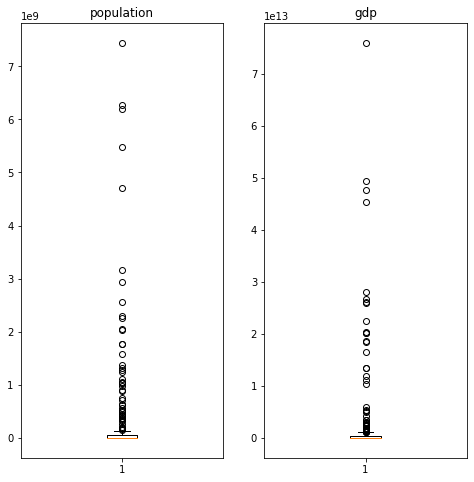

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig, ax = plt.subplots(1,2,figsize = (8,8))
# TODO: Make a boxplot of the population data for the year 2016
ax[0].boxplot(df_2016['population'])
ax[0].set_title('population')
# TODO: Make a boxplot of the gdp data for the year 2016
ax[1].boxplot(df_2016['gdp'])
ax[1].set_title('gdp')
plt.show()

Use the Tukey rule to determine what values of the population data are outliers for the year 2016. The Tukey rule finds outliers in one-dimension. The steps are:

* Find the first quartile (ie .25 quantile)
* Find the third quartile (ie .75 quantile)
* Calculate the inter-quartile range (Q3 - Q1)
* Any value that is greater than Q3 + 1.5 * IQR is an outlier
* Any value that is less than Qe - 1.5 * IQR is an outlier

In [27]:
# TODO: Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14789,Arab World,4.064527e+08
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14843,East Asia & Pacific (excluding high income),2.053299e+09
14844,Early-demographic dividend,3.170658e+09
14845,East Asia & Pacific,2.298727e+09
14846,Europe & Central Asia (excluding high income),4.132349e+08
14847,Europe & Central Asia,9.116863e+08
14850,Euro area,3.406174e+08


Many of these aren't countries at all but rather aggregates of various countries. Notice as well that the min_value calculated above was negative. According to the Tukey rule, there are no minimum population outliers in this data set. If you were going to study how population and gdp correlate, you might want to remove these aggregated regions from the data set.

Next, use the Tukey method to do the same analysis for gdp.

In [28]:
# TODO: Filter the data for the year 2016 and put the results in the gdp_2016 variable. You only need
# to keep the Country Name and population columns
gdp_2016 = df_2016[['Country Name','gdp']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = gdp_2016['gdp'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers


,Country Name,gdp
14789,Arab World,2.500164e+12
14795,Australia,1.208039e+12
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14818,Central Europe and the Baltics,1.313067e+12
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14843,East Asia & Pacific (excluding high income),1.350933e+13
14844,Early-demographic dividend,1.043743e+13
14845,East Asia & Pacific,2.251217e+13


Clearly many of these outliers are due to regional data getting aggregated together. 

Remove these data points and redo the analysis. There's a list provided below of the 'Country Name' values that are not actually countries.

In [29]:
# TODO: remove the rows from the data that have Country Name values in the non_countries list
# Store the filter results back into the df_2016 variable

non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]

In [30]:
# TODO: Re-rerun the Tukey code with this filtered data to find population outliers
# TODO: Filter the data for the year 2016 and put the results in the population_2016 variable. You only need
# to keep the Country Name and population columns
population_2016 = df_2016[['Country Name','population']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = population_2016['population'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = population_2016['population'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
population_outliers = population_2016[(population_2016['population'] > max_value) | (population_2016['population'] < min_value)]
population_outliers

,Country Name,population
14802,Bangladesh,1.629516e+08
14811,Brazil,2.076529e+08
14822,China,1.378665e+09
14825,"Congo, Dem. Rep.",7.873615e+07
14837,Germany,8.234867e+07
14849,"Egypt, Arab Rep.",9.568868e+07
14854,Ethiopia,1.024032e+08
14859,France,6.685977e+07
14863,United Kingdom,6.559556e+07
14888,Indonesia,2.611155e+08


In [31]:
# TODO: Re-rerun the Tukey code with this filtered data to find gdp outliers in 2016
# TODO: Filter the data for the year 2016 and put the results in the gdp_2016 variable. You only need
# to keep the Country Name and population columns
gdp_2016 = df_2016[['Country Name','gdp']]

# TODO: Calculate the first quartile of the population values for 2016
# HINT: you can use the pandas quantile method 
Q1 = gdp_2016['gdp'].quantile(.25)

# TODO: Calculate the third quartile of the population values for 2016
Q3 = gdp_2016['gdp'].quantile(.75)

# TODO: Calculate the interquartile range Q3 - Q1
IQR = Q3 - Q1

# TODO: Calculate the maximum value and minimum values according to the Tukey rule
# max_value is Q3 + 1.5 * IQR while min_value is Q1 - 1.5 * IQR
max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# TODO: filter the population_2016 data for population values that are greater than max_value or less than min_value
gdp_outliers = gdp_2016[(gdp_2016['gdp'] > max_value) | (gdp_2016['gdp'] < min_value)]
gdp_outliers



,Country Name,gdp
14791,Argentina,5.548609e+11
14795,Australia,1.208039e+12
14796,Austria,3.908000e+11
14799,Belgium,4.675455e+11
14811,Brazil,1.793989e+12
14817,Canada,1.535768e+12
14819,Switzerland,6.687453e+11
14822,China,1.119099e+13
14837,Germany,3.477796e+12
14852,Spain,1.237255e+12


Next, write code to determine which countries are in the population_outliers array and in the gdp_outliers array. 

In [32]:
# TODO: Find country names that are in both the population_outliers and the gdp_outliers 
# HINT: you can use the pandas intersection() method and python set() and list() methods
not_outliers = set(population_outliers['Country Name']) & set(gdp_outliers['Country Name']) 


These countries have both relatively high populations and high GDPs. That might be an indication that although these countries have high values for both gdp and population, they're not true outliers when looking at these values from a two-dimensional perspective.

Now write code to find countries in population_outliers but not in the gdp_outliers. 

In [33]:
# TODO: Find country names that are in the population outliers list but not the gdp outliers list
# HINT: Python's set() and list() methods should be helpful
pop_ol = list(set(population_outliers['Country Name']) - not_outliers)
pop_ol

['Egypt, Arab Rep.',
 'Vietnam',
 'Philippines',
 'Congo, Dem. Rep.',
 'Bangladesh',
 'Pakistan',
 'Ethiopia']

These countries are population outliers but not GDP outliers. If looking at outliers from a two-dimensional perspective, there's some indication that these countries might be outliers.

And finally, write code to find countries that are in the gdp_outliers array but not the population_outliers array.

In [34]:
# TODO: Find country names that are in the gdp outliers list but not the population outliers list
# HINT: Python's set() and list() methods should be helpful

gdp_ol= list(set(gdp_outliers['Country Name']) - not_outliers)
gdp_ol

['Venezuela, RB',
 'Sweden',
 'Australia',
 'Austria',
 'Korea, Rep.',
 'Netherlands',
 'Spain',
 'Belgium',
 'Saudi Arabia',
 'Canada',
 'Switzerland',
 'Poland',
 'Argentina']

On the other hand, these countries have high GDP but are not population outliers.


# Demo: 2-Dimensional Analysis

Next, look at the data from a two-dimensional perspective. You don't have to do anything in this section other than run the code cells below. This gives a basic example of how outlier removal affects machine learning algorithms.

The next code cell plots the GDP vs Population data including the country name of each point.

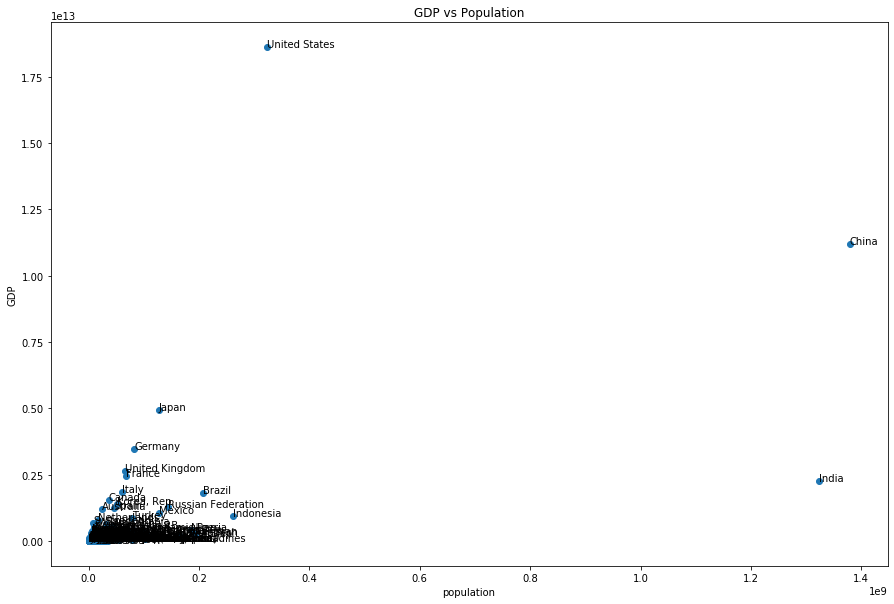

In [35]:
# run the code cell below
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

The United States, China, and India have such larger values that it's hard to see this data. Let's take those countries out for a moment and look at the data again.

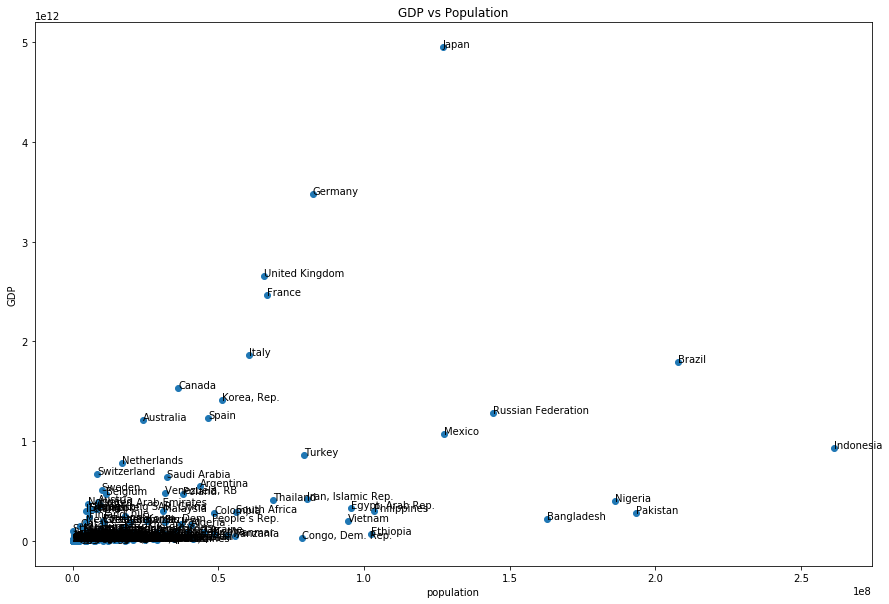

In [36]:
# Run the code below to see the results 
df_no_large = (df_2016['Country Name'] != 'United States') & (df_2016['Country Name'] != 'India') & (df_2016['Country Name'] != 'China')
x = list(df_2016[df_no_large]['population'])
y = list(df_2016[df_no_large]['gdp'])
text = df_2016[df_no_large]['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('population')
plt.ylabel('GDP')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

Run the code below to build a simple linear regression model with the population and gdp data for 2016.

[[6.54170378e+12]]


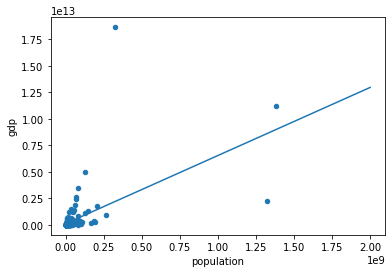

In [50]:
from sklearn.linear_model import LinearRegression

# fit a linear regression model on the population and gdp data
model = LinearRegression()
model.fit(df_2016['population'].values.reshape(-1, 1), df_2016['gdp'].values.reshape(-1, 1))
# .values.reshape(n,1), because n is unknow, can use -1 to substitute

# plot the data along with predictions from the linear regression model
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))

df_2016.plot('population', 'gdp', kind='scatter')
plt.plot(inputs, predictions);
print(model.predict([[1000000000]])) # model.predict should use a 2D array, [[1000000000]]


Notice that the code ouputs a GDP value of 6.54e+12 when population equals 1e9. Now run the code below when the United States is taken out of the data set.

[[5.25824554e+12]]


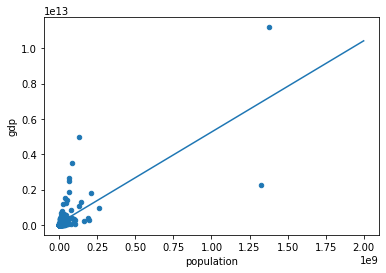

In [51]:
# Remove the United States to see what happens with the linear regression model
df_2016[df_2016['Country Name'] != 'United States'].plot('population', 'gdp', kind='scatter')
# plt.plot(inputs, predictions)
model.fit(df_2016[df_2016['Country Name'] != 'United States']['population'].values.reshape(-1, 1), 
          df_2016[df_2016['Country Name'] != 'United States']['gdp'].values.reshape(-1, 1))
inputs = np.linspace(1, 2000000000, num=50)
predictions = model.predict(inputs.reshape(-1,1))
plt.plot(inputs, predictions)
print(model.predict([[1000000000]]))

Notice that the code now ouputs a GDP value of 5.26e+12 when population equals 1e9. In other words, removing the United States shifted the linear regression line down.

# Conclusion

Data scientists sometimes have the task of creating an outlier removal model. In this exercise, you've used the Tukey rule. There are other one-dimensional models like eliminating data that is far from the mean. There are also more sophisticated models that take into account multi-dimensional data.

Remember, however, that this is a course on data engineering. As a data engineer, your job will be to remove outliers using code based on whatever model you're given.

If you were using the Tukey rule, for example, you'd calculate Q1, Q3, and IQR on your training data. You'd need to store these results. Then as new data comes in, you'd use these stored values to eliminate any outliers.

# Eliminating Outliers

Eliminating outliers is a big topic. There are many different ways to eliminate outliers. A data engineer's job isn't necessarily to decide what counts as an outlier and what does not. A data scientist would determine that. The data engineer would code the algorithms that eliminate outliers from a data set based on any criteria that a data scientist has decided.

In this exercise, you'll write code to eliminate outliers based on the Tukey rule.

Run the code cell below to read in the data and visualize the data.

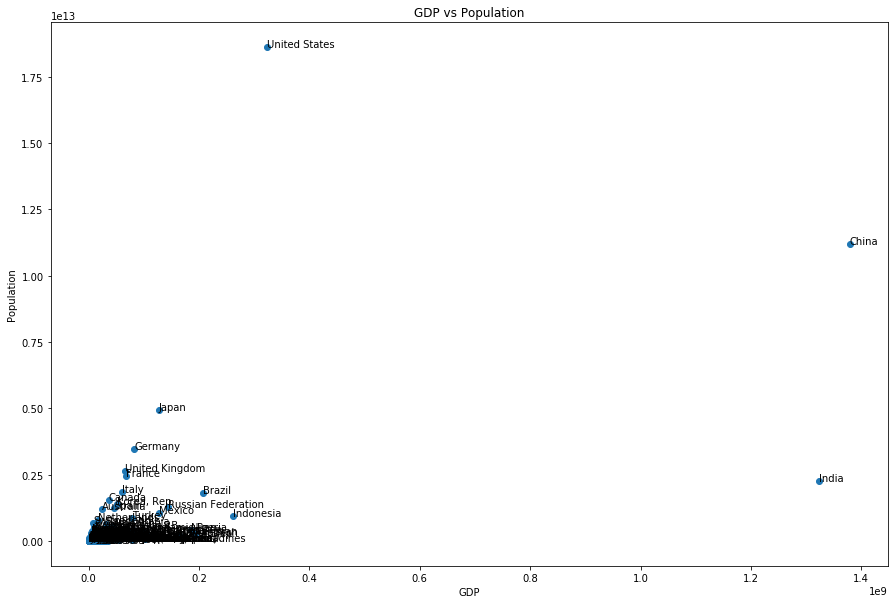

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# plot the data
x = list(df_2016['population'])
y = list(df_2016['gdp'])
text = df_2016['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

# Exercise

Write a function that uses the Tukey rule to eliminate outliers from an array of data.

In [54]:
# TODO: Write a function that uses the Tukey rule to detect outliers in a dataframe column 
# and then removes that entire row from the data frame. For example, if the United States 
# is detected to be a GDP outlier, then remove the entire row of United States data.
# The function inputs should be a data frame and a column name.
# The output is a data_frame with the outliers eliminated

# HINT: Re-use code from the previous exercise

def tukey_rule(data_frame, column_name):
    
    Q1 = data_frame[column_name].quantile(.25)
    Q3 = data_frame[column_name].quantile(.75)
    IQR = Q3 - Q1
    max_value = Q3 + IQR * 1.5
    min_value = Q1 - IQR * 1.5
    
    data_frame = data_frame[(data_frame[column_name] <= max_value) & 
                            (data_frame[column_name] >= min_value)]
        
    return data_frame


Now use the function to eliminate population outliers and then gdp outliers from the dataframe. Store results in the df_outlier_removed variable.

In [55]:
# TODO: Use the tukey_rule() function to make a new data frame with gdp and population outliers removed
# Put the results in the df_outlier_removed variable

df_outlier_removed = df_2016.copy()
df_outlier_removed = tukey_rule(df_outlier_removed, 'population')
df_outlier_removed = tukey_rule(df_outlier_removed, 'gdp')


Run the code cell below to plot the results.

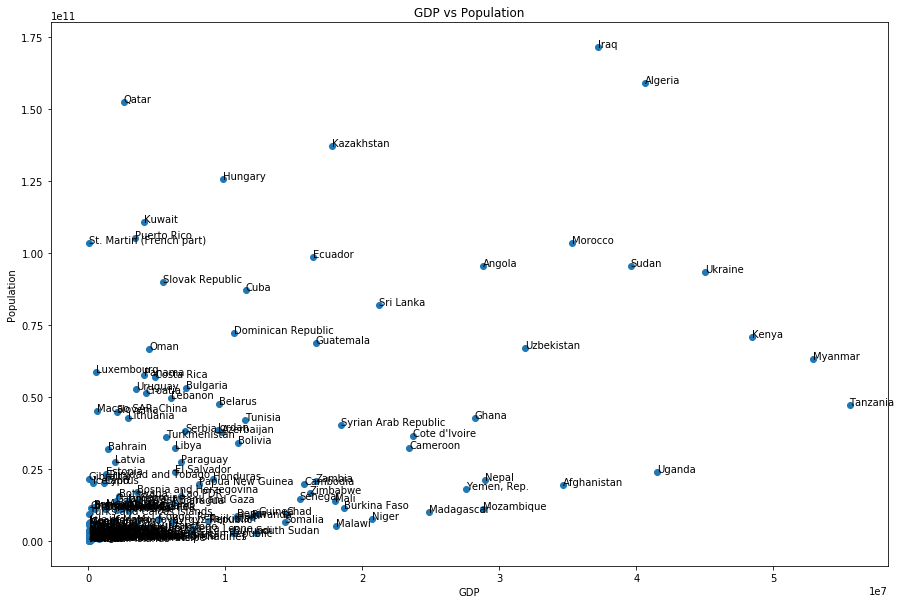

In [56]:
# plot the data
x = list(df_outlier_removed['population'])
y = list(df_outlier_removed['gdp'])
text = df_outlier_removed['Country Name']

fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
plt.title('GDP vs Population')
plt.xlabel('GDP')
plt.ylabel('Population')
for i, txt in enumerate(text):
    ax.annotate(txt, (x[i],y[i]))

# Scaling Data

In this exercise, you'll practice scaling data. Sometimes, you'll see the terms **standardization** and **normalization** used interchangeably when referring to feature scaling. However, these are slightly different operations. Standardization refers to scaling a set of values so that they have a mean of zero and a standard deviation of one. Normalization refers to scaling a set of values so that the range if between zero and one.

In this exercise, you'll practice implementing standardization and normalization in code. There are libraries, like scikit-learn, that can do this for you; however, in data engineering, you might not always have these tools available.

Run this first cell to read in the World Bank GDP and population data. This code cell also filters the data for 2016 and filters out the aggregated values like 'World' and 'OECD Members'.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]


# show the first ten rows
print('first ten rows of data')
df_2016.head(10)

first ten rows of data


,Country Name,year,gdp,population
14784,Aruba,2016,2.584464e+09,104822.0
14785,Afghanistan,2016,1.946902e+10,34656032.0
14786,Angola,2016,9.533720e+10,28813463.0
14787,Albania,2016,1.188368e+10,2876101.0
14788,Andorra,2016,2.877312e+09,77281.0
14790,United Arab Emirates,2016,3.570451e+11,9269612.0
14791,Argentina,2016,5.548609e+11,43847430.0
14792,Armenia,2016,1.054614e+10,2924816.0
14793,American Samoa,2016,6.580000e+08,55599.0
14794,Antigua and Barbuda,2016,1.460145e+09,100963.0


# Exercise - Normalize the Data

To normalize data, you take a feature, like gdp, and use the following formula

$x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$

where 
* x is a value of gdp
* x_max is the maximum gdp in the data
* x_min is the minimum GDP in the data

First, write a function that outputs the x_min and x_max values of an array. The inputs are an array of data (like the GDP data). The outputs are the x_min and x_max values

In [63]:
def x_min_max(data):
    # TODO: Complete this function called x_min_max() 
    # The input is an array of data as an input 
    # The outputs are the minimum and maximum of that array
    minimum = min(data)
    maximum = max(data)
    return [minimum, maximum]

# this should give the result (36572611.88531479, 18624475000000.0)
x_min_max(df_2016['gdp'])

[36572611.88531479, 18624475000000.0]

Next, write a function that normalizes a data point. The inputs are an x value, a minimum value, and a maximum value. The output is the normalized data point

In [62]:
def normalize(x, x_min, x_max):
    # TODO: Complete this function
    # The input is a single value 
    # The output is the normalized value
    return (x - x_min) / (x_max - x_min)

Why are you making these separate functions? Let's say you are training a machine learning model and using normalized GDP as a feature. As new data comes in, you'll want to make predictions using the new GDP data. You'll have to normalize this incoming data. To do that, you need to store the x_min and x_max from the training set. Hence the x_min_max() function gives you the minimum and maximum values, which you can then store in a variable.

A good way to keep track of the minimum and maximum values would be to use a class. In this next section, fill out the Normalizer() class code to make a class that normalizes a data set and stores min and max values. 

In [86]:
class Normalizer():
    # TODO: Complete the normalizer class
    # The normalizer class receives a dataframe as its only input for initialization
    # For example, the data frame might contain gdp and population data in two separate columns
    # Follow the TODOs in each section
    
    def __init__(self, dataframe):
        
        # TODO: complete the init function. 
        # Assume the dataframe has an unknown number of columns like [['gdp', 'population']] 
        # iterate through each column calculating the min and max for each column
        # append the results to the params attribute list
        
        # For example, take the gdp column and calculate the minimum and maximum
        # Put these results in a list [minimum, maximum]
        # Append the list to the params variable
        # Then take the population column and do the same
        
        # HINT: You can put your x_min_max() function as part of this class and use it
        
        # HINT: Use a for loop to iterate through the columns of the dataframe
        self.dataframe = dataframe
        self.params = []
        for col in dataframe.columns:
            self.params.append(list(x_min_max(self.dataframe[col])))
            
    def x_min_max(data):
        # TODO: complete the x_min_max method
        # HINT: You can use the same function defined earlier in the exercise
        minimum = None
        maximum = None
        return minimum, maximum

    def normalize_data(self, x):
        # TODO: complete the normalize_data method
        # The function receives a data point as an input and then outputs the normalized version
        # For example, if an input data point of [gdp, population] were used. Then the output would
        # be the normalized version of the [gdp, population] data point
        # Put the results in the normalized variable defined below
        
        # Assume that the columns in the dataframe used to initialize an object are in the same
        # order as this data point x
        
        # HINT: You cannot use the normalize_data function defined earlier in the exercise.
        # You'll need to iterate through the individual values in the x variable. A for loop and the 
        #    Python enumerate method might be useful.
        # Use the params attribute where the min and max values are stored 
        normalized = []
        for i,val in enumerate(x):
            normalized.append((val - self.params[i][0]) / (self.params[i][1] - self.params[i][0]))
        return normalized

Run the code cells below to check your results

In [87]:
gdp_normalizer = Normalizer(df_2016[['gdp', 'population']])

In [88]:
# This cell should output: [(36572611.88531479, 18624475000000.0), (11097.0, 1378665000.0)]
gdp_normalizer.params

[[36572611.88531479, 18624475000000.0], [11097.0, 1378665000.0]]

In [89]:
# This cell should output [0.7207969507229194, 0.9429407193285986]
gdp_normalizer.normalize_data([13424475000000.0, 1300000000])

[0.7207969507229194, 0.9429407193285986]

# Conclusion

When normalizing or standardizing features for machine learning, you'll need to store the parameters you used to do the scaling. That way you can scale new data points when making predictions. In this exercise, you stored the minimum and maximum values of a feature. When standardizing data, you would need to store the mean and standard deviation. The standardization formula is:

$x_{standardized} = \frac{x - \overline{x}}{S}$

# Feature Engineering

Practice creating new features from the GDP and population data. 

You'll create a new feature gdppercapita, which is GDP divided by population. You'll then write code to create new features like GDP squared and GDP cubed. 

Start by running the code below. It reads in the World Bank data, filters the data for the year 2016, and cleans the data.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Country Code', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby('Country Name')['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_country = gdp_melt.merge(population_melt, on=('Country Name', 'year'))

# filter data for the year 2016
df_2016 = df_country[df_country['year'] == '2016']

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_2016 = df_2016[~df_2016['Country Name'].isin(non_countries)]
df_2016.reset_index(inplace=True, drop=True)

In [91]:
df_2016.head()

,Country Name,year,gdp,population
0,Aruba,2016,2.584464e+09,104822.0
1,Afghanistan,2016,1.946902e+10,34656032.0
2,Angola,2016,9.533720e+10,28813463.0
3,Albania,2016,1.188368e+10,2876101.0
4,Andorra,2016,2.877312e+09,77281.0


# Exercise 1

Create a new feature called gdppercapita in a new column. This feature should be the gdp value divided by the population

In [92]:
# TODO: create a new feature called gdppercapita, 
#      which is the gdp value divided by the population value for each country

df_2016['gdppercapita'] = df_2016['gdp']/ df_2016['population']

# Exercise 2 (Challenge)

This next exercise is more challenging and assumes you know how to use the pandas apply() method as well as lambda functions. 

Write code that creates multiples of a feature. For example, if you take the 'gdp' column and an integer like 3, you want to append a new column with the square of gdp (gdp^2) and another column with the cube of gdp (gdp^3).

Follow the TODOs below. These functions build on each other in the following way:

create_multiples(b, k) has two inputs. The first input, b, is a floating point number. The second number, k, is an integer. The output is a list of multiples of b. For example create_multiples(3, 4) would return this list: $[3^2, 3^3, 3^4]$ or in other words $[9, 27, 81]$.

Then the column_name_generator(colname, k) function outputs a list of column names. For example, column_name_generator('gdp', 4) would output a list of strings `['gdp2', 'gdp3', 'gdp4']`.

And finally, concatenate_features(df, column, num_columns) uses the two previous functions to create the new columns and then append these new columns to the original data frame.

In [99]:
# TODO: Fill out the create_multiples function.
# The create_multiples function has two inputs. A floating point number and an integer.
# The output is a list of multiples of the input b starting from the square of b and ending at b^k.

def create_multiples(b, k):
    
    # TODO: use a for loop to make a list of multiples of b: ie b^2, b^3, b^4, etc... until b^k
    # You do not need to include b^0, which would be 1. You also do not need b^1 because that feature
    # is already in data frame.

    new_features = []
    for i in range(1,k):
        new_features.append(b**(i+1))
    
    return new_features

# TODO: Fill out the column_name_generator function.
# The function has two inputs: a string representing a column name and an integer k. 
# The 'k' variable is the same as the create_multiples function.
# The output should be a list of column names.
# For example if the inputs are ('gdp', 4) then the output is a list of strings ['gdp2', 'gdp3', gdp4']
def column_name_generator(colname, k):
    
    col_names = []
    for i in range(1,k):
        col_names.append(colname+str(i+1))
    return col_names

# TODO: Fill out the concatenate_features function.
# The function has three inputs. A dataframe, a column name represented by a string, and an integer representing
# the maximum power to create when engineering features.

# If the input is (df_2016, 'gdp', 3), then the output will be the df_2016 dataframe with two new columns
# One new column will be 'gdp2' ie gdp^2, and then other column will be 'gdp3' ie gdp^3.

# HINT: There may be more than one way to do this.
# The TODOs in this section point you towards one way that works
def concatenate_features(df, column, num_columns):
    
    # TODO: Use the pandas apply() method to create the new features. Inside the apply method, you
    # can use a lambda function with the create_mtuliples function
    # HINT: df[column].apply(lambda ....)
    new_features = df[column].apply(lambda x : create_multiples(x, num_columns))
    
    # TODO: Create a dataframe with a separate column for each of the new features
    # Use the column_name_generator() function to create the column names
    
    # HINT: In the pd.DataFrame() method, you can specify column names inputting a list in the columns option
    # HINT: Using new_features.tolist() might be helpful
    new_features_df = pd.DataFrame(new_features.tolist(), columns = column_name_generator(column, num_columns))
    
    # TODO: concatenate the original date frame in df with the new_features_df dataframe
    # return this concatenated dataframe
    df = pd.concat([df,new_features_df],axis = 1)
    
    return df


# Solution

Run the code cell below. If your code is correct, you should get a dataframe with 8 columns. Here are the first two rows of what your results should look like. 

| Country Name | year | gdp          | population | gdppercapita | gdp2         | gdp3         | gdp4         |
|--------------|------|--------------|------------|--------------|--------------|--------------|--------------|
| Aruba        | 2016 | 2.584464e+09 | 104822.0   | 24655.737223 | 6.679453e+18 | 1.726280e+28 | 4.461509e+37 |
| Afghanistan  | 2016 | 1.946902e+10 | 34656032.0 | 561.778746   | 3.790428e+20 | 7.379593e+30 | 1.436735e+41 |




There is a solution in the 16_featureengineering_exercise folder if you go to File->Open.

In [100]:
concatenate_features(df_2016, 'gdp', 4)

,Country Name,year,gdp,population,gdppercapita,gdp2,gdp3,gdp4
0,Aruba,2016,2.584464e+09,104822.0,24655.737223,6.679453e+18,1.726280e+28,4.461509e+37
1,Afghanistan,2016,1.946902e+10,34656032.0,561.778746,3.790428e+20,7.379593e+30,1.436735e+41
2,Angola,2016,9.533720e+10,28813463.0,3308.772828,9.089182e+21,8.665372e+32,8.261324e+43
3,Albania,2016,1.188368e+10,2876101.0,4131.872341,1.412219e+20,1.678236e+30,1.994363e+40
4,Andorra,2016,2.877312e+09,77281.0,37231.815671,8.278924e+18,2.382105e+28,6.854058e+37
...,...,...,...,...,...,...,...,...
212,Kosovo,2016,6.715487e+09,1816200.0,3697.548026,4.509776e+19,3.028534e+29,2.033808e+39
213,"Yemen, Rep.",2016,1.821333e+10,27584213.0,660.280885,3.317253e+20,6.041823e+30,1.100417e+41
214,South Africa,2016,2.957627e+11,56015473.0,5280.017633,8.747557e+22,2.587201e+34,7.651975e+45
215,Zambia,2016,2.095475e+10,16591390.0,1262.989682,4.391017e+20,9.201269e+30,1.928103e+41


# Load
## Links to Other Data Storage Systems
- [ranking of database engines](https://db-engines.com/en/ranking)
- [Redis](https://redis.io/)
- [Cassandra](http://cassandra.apache.org/)
- [Hbase](http://hbase.apache.org/)
- [MongoDB](https://www.mongodb.com/)

In this exercise, you'll load data into different formats: a csv file, a json file, and a SQLite database.

You'll work with the GDP, population, and projects data. Run the code cell below to read in and clean the World Bank population and gdp data. This code creates a dataframe called df_indicator with both the gdp and population data.

In [159]:
# run this code cell - there is nothing for you to do in this code cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# read in the projects data set and do basic wrangling 
gdp = pd.read_csv('gdp_data.csv', skiprows=4)
gdp.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)
population = pd.read_csv('population_data.csv', skiprows=4)
population.drop(['Unnamed: 62', 'Indicator Name', 'Indicator Code'], inplace=True, axis=1)


# Reshape the data sets so that they are in long format
gdp_melt = gdp.melt(id_vars=['Country Name', 'Country Code'], 
                    var_name='year', 
                    value_name='gdp')

# Use back fill and forward fill to fill in missing gdp values
gdp_melt['gdp'] = gdp_melt.sort_values('year').groupby(['Country Name', 'Country Code'])['gdp'].fillna(method='ffill').fillna(method='bfill')

population_melt = population.melt(id_vars=['Country Name', 'Country Code'], 
                                  var_name='year', 
                                  value_name='population')

# Use back fill and forward fill to fill in missing population values
population_melt['population'] = population_melt.sort_values('year').groupby('Country Name')['population'].fillna(method='ffill').fillna(method='bfill')

# merge the population and gdp data together into one data frame
df_indicator = gdp_melt.merge(population_melt, on=('Country Name', 'Country Code', 'year'))

# filter out values that are not countries
non_countries = ['World',
 'High income',
 'OECD members',
 'Post-demographic dividend',
 'IDA & IBRD total',
 'Low & middle income',
 'Middle income',
 'IBRD only',
 'East Asia & Pacific',
 'Europe & Central Asia',
 'North America',
 'Upper middle income',
 'Late-demographic dividend',
 'European Union',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (IDA & IBRD countries)',
 'Euro area',
 'Early-demographic dividend',
 'Lower middle income',
 'Latin America & Caribbean',
 'Latin America & the Caribbean (IDA & IBRD countries)',
 'Latin America & Caribbean (excluding high income)',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Middle East & North Africa',
 'Europe & Central Asia (excluding high income)',
 'South Asia (IDA & IBRD)',
 'South Asia',
 'Arab World',
 'IDA total',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (IDA & IBRD countries)',
 'Sub-Saharan Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (IDA & IBRD countries)',
 'Central Europe and the Baltics',
 'Pre-demographic dividend',
 'IDA only',
 'Least developed countries: UN classification',
 'IDA blend',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'Low income',
 'Small states',
 'Other small states',
 'Not classified',
 'Caribbean small states',
 'Pacific island small states']

# remove non countries from the data
df_indicator  = df_indicator[~df_indicator['Country Name'].isin(non_countries)]
df_indicator.reset_index(inplace=True, drop=True)

df_indicator.columns = ['countryname', 'countrycode', 'year', 'gdp', 'population']

# output the first few rows of the data frame
df_indicator.head()

,countryname,countrycode,year,gdp,population
0,Aruba,ABW,1960,1.916242e+09,54211.0
1,Afghanistan,AFG,1960,5.377778e+08,8996351.0
2,Angola,AGO,1960,1.857319e+10,5643182.0
3,Albania,ALB,1960,1.857319e+10,1608800.0
4,Andorra,AND,1960,1.857319e+10,13411.0


Run this code cell to read in the countries data set. This will create a data frame called df_projects containing the World Bank projects data. The data frame only has the 'id', 'countryname', 'countrycode', 'totalamt', and 'year' columns.

In [160]:
# run this code cell - there is nothing for you to do here 

!pip install pycountry
from pycountry import countries

# read in the projects data set with all columns type string
df_projects = pd.read_csv('projects_data.csv', dtype=str)
df_projects.drop(['Unnamed: 56'], axis=1, inplace=True)

df_projects['countryname'] = df_projects['countryname'].str.split(';').str.get(0)

# set up the libraries and variables
from collections import defaultdict
country_not_found = [] # stores countries not found in the pycountry library
project_country_abbrev_dict = defaultdict(str) # set up an empty dictionary of string values

# iterate through the country names in df_projects. 
# Create a dictionary mapping the country name to the alpha_3 ISO code
for country in df_projects['countryname'].drop_duplicates().sort_values():
    try: 
        # look up the country name in the pycountry library
        # store the country name as the dictionary key and the ISO-3 code as the value
        project_country_abbrev_dict[country] = countries.lookup(country).alpha_3
    except:
        # If the country name is not in the pycountry library, then print out the country name
        # And store the results in the country_not_found list
        country_not_found.append(country)
        
# run this code cell to load the dictionary

country_not_found_mapping = {'Co-operative Republic of Guyana': 'GUY',
             'Commonwealth of Australia':'AUS',
             'Democratic Republic of Sao Tome and Prin':'STP',
             'Democratic Republic of the Congo':'COD',
             'Democratic Socialist Republic of Sri Lan':'LKA',
             'East Asia and Pacific':'EAS',
             'Europe and Central Asia': 'ECS',
             'Islamic  Republic of Afghanistan':'AFG',
             'Latin America':'LCN',
              'Caribbean':'LCN',
             'Macedonia':'MKD',
             'Middle East and North Africa':'MEA',
             'Oriental Republic of Uruguay':'URY',
             'Republic of Congo':'COG',
             "Republic of Cote d'Ivoire":'CIV',
             'Republic of Korea':'KOR',
             'Republic of Niger':'NER',
             'Republic of Kosovo':'XKX',
             'Republic of Rwanda':'RWA',
              'Republic of The Gambia':'GMB',
              'Republic of Togo':'TGO',
              'Republic of the Union of Myanmar':'MMR',
              'Republica Bolivariana de Venezuela':'VEN',
              'Sint Maarten':'SXM',
              "Socialist People's Libyan Arab Jamahiriy":'LBY',
              'Socialist Republic of Vietnam':'VNM',
              'Somali Democratic Republic':'SOM',
              'South Asia':'SAS',
              'St. Kitts and Nevis':'KNA',
              'St. Lucia':'LCA',
              'St. Vincent and the Grenadines':'VCT',
              'State of Eritrea':'ERI',
              'The Independent State of Papua New Guine':'PNG',
              'West Bank and Gaza':'PSE',
              'World':'WLD'}

project_country_abbrev_dict.update(country_not_found_mapping)

df_projects['countrycode'] = df_projects['countryname'].apply(lambda x: project_country_abbrev_dict[x])

df_projects['boardapprovaldate'] = pd.to_datetime(df_projects['boardapprovaldate'])

df_projects['year'] = df_projects['boardapprovaldate'].dt.year.astype(str).str.slice(stop=4)

df_projects['totalamt'] = pd.to_numeric(df_projects['totalamt'].str.replace(',',""))

df_projects = df_projects[['id', 'countryname', 'countrycode', 'totalamt', 'year']]

df_projects.head()

,id,countryname,countrycode,totalamt,year
0,P162228,World,WLD,0,2018
1,P163962,Democratic Republic of the Congo,COD,200000000,2018
2,P167672,People's Republic of Bangladesh,BGD,58330000,2018
3,P158768,Islamic Republic of Afghanistan,AFG,20000000,2018
4,P161364,Federal Republic of Nigeria,NGA,100000000,2018


# Exercise Part 1

The first few cells in this workbook loaded and cleaned the World Bank Data. You now have two data frames:
* df_projects, which contain data from the projects data set
* df_indicator, which contain population and gdp data for various years

They both have country code variables. Note, however, that there could be countries represented in the projects data set that are not in the indicator data set and vice versus.

In this first exercise, merge the two data sets together using country code and year as common keys. When joining the data sets, keep all of the data in the df_projects dataframe even if there is no indicator data for that country code.

In [107]:
# TODO: merge the projects and indicator data frames together using countrycode and year as common keys
# Use a left join so that all projects are returned even if the country/year combination does not have 
# indicator data

df_merged = df_projects.merge(df_indicator, on = ['countrycode','year'], how = 'left')



If you look at the first few rows of the merged data set, you'll see NaN's for the indicator data. That is because the indicator data does not contain values for 2018. If you run the code cell below, you should get the following results:


||id | countryname_x	| countrycode	|totalamt	|year	|countryname_y	|gdp	| population|
|-|-|-|-|-|-|-|
|256|	P161982|	Hashemite Kingdom of Jordan|	JOR|	0|	2017|	Jordan	|4.006831e+10|	9702353.0|
|301|	P162407|	Hashemite Kingdom of Jordan|	JOR|	147700000|	2017|	Jordan|	4.006831e+10|	9702353.0|
|318|	P160103|	Hashemite Kingdom of Jordan|	JOR|	0|	2017|	Jordan	|4.006831e+10	|9702353.0|
|464|	P161905|	Hashemite Kingdom of Jordan|	JOR|	50000000|	2017	|Jordan	|4.006831e+10	|9702353.0|
|495|	P163387|	Hashemite Kingdom of Jordan|	JOR|	36100000|	2017	|Jordan	|4.006831e+10	|9702353.0|
|515|	P163241|	Hashemite Kingdom of Jordan|	JOR|	0|	2017|	Jordan|	4.006831e+10|	9702353.0|

In [108]:
# Run this code to check your work
df_merged[(df_merged['year'] == '2017') & (df_merged['countryname_y'] == 'Jordan')]

,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
256,P161982,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
301,P162407,Hashemite Kingdom of Jordan,JOR,147700000,2017,Jordan,4.006831e+10,9702353.0
318,P160103,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0
464,P161905,Hashemite Kingdom of Jordan,JOR,50000000,2017,Jordan,4.006831e+10,9702353.0
495,P163387,Hashemite Kingdom of Jordan,JOR,36100000,2017,Jordan,4.006831e+10,9702353.0
515,P163241,Hashemite Kingdom of Jordan,JOR,0,2017,Jordan,4.006831e+10,9702353.0


# Exercise Part 2

Output the df_merged dataframe as a json file. You can use the pandas [to_json() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html).

In [109]:
# TODO: Output the df_merged data frame as a json file
# HINT: Pandas has a to_json() method
# HINT: use orient='records' to get one of the more common json formats
# HINT: be sure to specify the name of the json file you want to create as the first input into to_json

df_merged.to_json('merged.txt',orient='records')


# Exercise Part 3

Output the df_merged dataframe as a csv file. You can use the pandas [to_csv() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html).

In [110]:
# TODO: Output the df_merged data frame as a csv file
# HINT: The to_csv() method is similar to the to_json() method.
# HINT: If you do not want the data frame indices in your result, use index=False
df_merged.to_csv('merged.csv',index=False)


# Exercise Part 4

Output the df_merged dataframe as a sqlite database file. For this exercise, you can put all of the data as one table. In the next exercise, you'll create a database with multiple tables. 

In [112]:
import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

# TODO: output the df_merged dataframe to a SQL table called 'merged'.
# HINT: Use the to_sql() method
# HINT: Use the conn variable for the connection parameter
# HINT: You can use the if_exists parameter like if_exists='replace' to replace a table if it already exists
df_merged.to_sql('merged', con = conn, if_exists = 'replace')


Run the code cell below to make sure that the worldbank.db file was created and the merged table loaded. You should get an output that is formatted like this:

|id|countryname_x|countrycode|totalamt|year|countryname_y|gdp|population
|-|-|-|-|-|-|-|-|
|P162033|'Federative  Republic of Brazil'|BRA|125000000|2017|Brazil|2.055506e+12|209288278.0|

In [113]:
pd.read_sql('SELECT * FROM merged WHERE year = "2017" AND countrycode = "BRA"', con = conn).head()

,index,id,countryname_x,countrycode,totalamt,year,countryname_y,gdp,population
0,273,P162033,Federative Republic of Brazil,BRA,125000000,2017,Brazil,2.055506e+12,209288278.0
1,285,P158000,Federative Republic of Brazil,BRA,0,2017,Brazil,2.055506e+12,209288278.0
2,289,P163868,Federative Republic of Brazil,BRA,250000000,2017,Brazil,2.055506e+12,209288278.0
3,313,P152285,Federative Republic of Brazil,BRA,0,2017,Brazil,2.055506e+12,209288278.0
4,346,P147158,Federative Republic of Brazil,BRA,50000000,2017,Brazil,2.055506e+12,209288278.0


# Exercise Part 5

Output the data to a SQL database like in the previous exercise; however, this time, put the df_indicator data in one table and the df_projects data in another table. Call the df_indicator table 'indicator' and the df_projects table 'projects'.

In [114]:
df_indicator.to_sql('indicator', con = conn, if_exists = 'replace')
df_projects.to_sql('projects', con = conn, if_exists = 'replace')

Run the code cell below to see if your code is working properly. The code cell below runs a SQL query against the worldbank.db database joining the indicator table with the projects table.

In [115]:
pd.read_sql('SELECT * FROM projects LEFT JOIN indicator ON \
projects.countrycode = indicator.countrycode AND \
projects.year = indicator.year WHERE \
projects.year = "2017" AND projects.countrycode = "BRA"', con = conn).head()

,index,id,countryname,countrycode,totalamt,year,index,countryname,countrycode,year,gdp,population
0,273,P162033,Federative Republic of Brazil,BRA,125000000,2017,12395,Brazil,BRA,2017,2.055506e+12,209288278.0
1,285,P158000,Federative Republic of Brazil,BRA,0,2017,12395,Brazil,BRA,2017,2.055506e+12,209288278.0
2,289,P163868,Federative Republic of Brazil,BRA,250000000,2017,12395,Brazil,BRA,2017,2.055506e+12,209288278.0
3,313,P152285,Federative Republic of Brazil,BRA,0,2017,12395,Brazil,BRA,2017,2.055506e+12,209288278.0
4,346,P147158,Federative Republic of Brazil,BRA,50000000,2017,12395,Brazil,BRA,2017,2.055506e+12,209288278.0


In [116]:
# commit any changes to the database and close the connection to the database
conn.commit()
conn.close()

# Exercise Part 6 (Challenge)

SQLite, as its name would suggest, is somewhat limited in its functionality. For example, the Alter Table command only allows you to change a table name or to add a new column to a table. You can't, for example, add a primary key to a table once the table is already created.

If you want more control over a sqlite3 database, it's better to use the sqlite3 library directly. Here is an example of how to use the sqlite3 library to create a table in the database, insert a value, and then run a SQL query on the database. Run the code cells below to see the example.

### Demo

In [161]:
# connect to the data base
conn = sqlite3.connect('worldbank.db')

# get a cursor
cur = conn.cursor()

# drop the test table in case it already exists
cur.execute("DROP TABLE IF EXISTS test")

# create the test table including project_id as a primary key
cur.execute("CREATE TABLE test (project_id TEXT PRIMARY KEY, countryname TEXT, countrycode TEXT, totalamt REAL, year INTEGER);")

# insert a value into the test table
cur.execute("INSERT INTO test (project_id, countryname, countrycode, totalamt, year) VALUES ('a', 'Brazil', 'BRA', '100,000', 1970);")

# commit changes made to the database
conn.commit()

# select all from the test table
cur.execute("SELECT * FROM test")
cur.fetchall()

[('a', 'Brazil', 'BRA', '100,000', 1970)]

In [162]:
# commit any changes and close the data base
conn.close()

### Exercise

Now, it's your turn. Use the sqlite3 library to connect to the worldbank.db database. Then: 
* Create a table, called projects, for the projects data where the primary key is the id of each project. 
* Create another table, called gdp, that contains the gdp data. 
* And create another table, called population, that contains the population data.

Here is the schema for each table.
##### projects

* project_id text 
* countryname text 
* countrycode text
* totalamt real
* year integer

project_id is the primary key

##### gdp
* countryname text
* countrycode text
* year integer
* gdp real

(countrycode, year) is the primary key

##### population
* countryname text
* countrycode text
* year integer
* population integer

(countrycode, year) is the primary key

After setting up the tables, write code that inserts the data into each table. (Note that this database is not normalized. For example, countryname and countrycode are in all three tables. You could make another table with countrycode and countryname and then create a foreign key constraint in the projects, gdp, and population tables. If you'd like an extra challenge, create a country table with countryname and countrycode. Then create the other tables with foreign key constraints).

Follow the TODOs in the next few code cells to finish the exercise.

In [163]:
# connect to the data base
conn = sqlite3.connect('worldbank.db')

# get a cursor
cur = conn.cursor()

# drop tables created previously to start fresh
cur.execute("DROP TABLE IF EXISTS test")
cur.execute("DROP TABLE IF EXISTS indicator")
cur.execute("DROP TABLE IF EXISTS projects")
cur.execute("DROP TABLE IF EXISTS gdp")
cur.execute("DROP TABLE IF EXISTS population")

# TODO create the projects table including project_id as a primary key
# HINT: Use cur.execute("SQL Query")
cur.execute("CREATE TABLE projects (project_id TEXT PRIMARY KEY, countryname TEXT, countrycode TEXT, totalamt REAL, year INTEGER);")

# TODO: create the gdp table including (countrycode, year) as primary key
# HINT: To create a primary key on multiple columns, you can do this:
# CREATE TABLE tablename (columna datatype, columnb datatype, columnc dataype, PRIMARY KEY (columna, columnb));
cur.execute("CREATE TABLE gdp (countryname TEXT, countrycode TEXT, year INTEGER, gdp REAL, PRIMARY KEY (countrycode, year));")

# TODO: create the gdp table including (countrycode, year) as primary key
cur.execute("CREATE TABLE population (countryname TEXT, countrycode TEXT, year INTEGER, population INTEGER, PRIMARY KEY (countrycode, year));")

# commit changes to the database. Do this whenever modifying a database
conn.commit()



In [164]:
# TODO:insert project values into the projects table
# HINT: Use a for loop with the pandas iterrows() method
# HINT: The iterrows() method returns two values: an index for each row and a tuple of values
# HINT: Some of the values for totalamt and year are NaN. Because you've defined
# year and totalamt as numbers, you cannot insert NaN as a value into those columns.
# When totaamt or year equal NaN, you'll need to change the value to something numeric
# like, for example, zero

# commit changes to the dataset after any changes are made

for index, values in df_projects.iterrows():
    project_id, countryname, countrycode, totalamt, year = values
    
    if totalamt == 'nan':
        totalamt = 0
    if year == 'nan':
        year = 0
    
    sql_string = 'INSERT INTO projects (project_id, countryname, countrycode, totalamt, year) VALUES ("{}", "{}", "{}", {}, {});'.format(project_id, countryname, countrycode, totalamt, year)
    cur.execute(sql_string)

conn.commit()


In [165]:
# TODO: insert gdp values into the gdp table
for index, values in df_indicator[['countryname', 'countrycode', 'year', 'gdp']].iterrows():
    countryname, countrycode, year, gdp = values
        
    sql_string = 'INSERT INTO gdp (countryname, countrycode, year, gdp) VALUES ("{}", "{}", {}, {});'.format(countryname, countrycode, year, gdp)
    cur.execute(sql_string)

conn.commit()

In [166]:
# TODO: insert population values into the population table
for index, values in df_indicator[['countryname', 'countrycode', 'year', 'population']].iterrows():
    countryname, countrycode, year, population = values
    
    sql_string = 'INSERT INTO population (countryname, countrycode, year, population) VALUES ("{}","{}","{}","{}")'\
                    .format(countryname, countrycode, year, population)
    cur.execute(sql_string)

conn.commit()


In [167]:
# run this command to see if your tables were loaded as expected
sqlquery = "SELECT * FROM projects JOIN gdp JOIN population ON projects.year = gdp.year AND projects.countrycode = gdp.countrycode AND projects.countrycode = population.countrycode AND projects.year=population.year;"
result = pd.read_sql(sqlquery, con=conn)
result.shape

(15537, 13)

# Final Exercise - Putting it All Together

In this last exercise, you'll write a full ETL pipeline for the GDP data. That means you'll extract the World Bank data, transform the data, and load the data all in one go. In other words, you'll want one Python script that can do the entire process.

Why would you want to do this? Imagine working for a company that creates new data every day. As new data comes in, you'll want to write software that periodically and automatically extracts, transforms, and loads the data.

To give you a sense for what this is like, you'll extract the GDP data one line at a time. You'll then transform that line of data and load the results into a SQLite database. The code in this exercise is somewhat tricky.

Here is an explanation of how this Jupyter notebook is organized:
1. The first cell connects to a SQLite database called worldbank.db and creates a table to hold the gdp data. You do not need to do anything in this code cell other than executing the cell.
2. The second cell has a function called extract_line(). You don't need to do anything in this code cell either besides executing the cell. This function is a [Python generator](https://wiki.python.org/moin/Generators). You don't need to understand how this works in order to complete the exercise. Essentially, a generator is like a regular function except instead of a return statement, a generator has a yield statement. Generators allow you to use functions in a for loop. In essence, this function will allow you to read in a data file one line at a time, run a transformation on that row of data, and then move on to the next row in the file.
3. The third cell contains a function called transform_indicator_data(). This function receives a line from the csv file and transforms the data in preparation for a load step.
4. The fourth cell contains a function called load_indicator_data(), which loads the trasnformed data into the gdp table in the worldbank.db database.
5. The fifth cell runs the ETL pipeilne
6. The sixth cell runs a query against the database to make sure everything worked correctly.

You'll need to modify the third and fourth cells.

In [188]:
# run this cell to create a database and a table, called gdp, to hold the gdp data
# You do not need to change anything in this code cell

import sqlite3

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

# get a cursor
cur = conn.cursor()

# drop the test table in case it already exists
cur.execute("DROP TABLE IF EXISTS gdp")

# create the test table including project_id as a primary key
cur.execute("CREATE TABLE gdp (countryname TEXT, countrycode TEXT, year INTEGER, gdp REAL, PRIMARY KEY (countrycode, year));")

conn.commit()
conn.close()

In [189]:
# Generator for reading in one line at a time
# generators are useful for data sets that are too large to fit in RAM
# You do not need to change anything in this code cell
def extract_lines(file):
    while True:
        line = file.readline()
        if not line:
            break
        yield line

In [190]:
# TODO: fill out the code wherever you find a TODO in this cell
# This function has two inputs:
#   data, which is a row of data from the gdp csv file
#   colnames, which is a list of column names from the csv file
# The output should be a list of [countryname, countrycode, year, gdp] values
# In other words, the output would look like:
# [[Aruba, ABW, 1994, 1.330168e+09], [Aruba, ABW, 1995, 1.320670e+09], ...]
#

import pandas as pd
import numpy as np
import sqlite3

# transform the indicator data
def transform_indicator_data(data, colnames):
    
    # get rid of quote marks
    for i, datum in enumerate(data):
        data[i] = datum.replace('"','')
    
    # TODO: the data variable contains a list of data in the form [countryname, countrycode, 1960, 1961, 1962,...]
    # since this is the format of the data in the csv file. Extract the countryname from the list 
    # and put the result in the country variable
    country = data[0]
    
    # these are "countryname" values that are not actually countries
    non_countries = ['World',
     'High income',
     'OECD members',
     'Post-demographic dividend',
     'IDA & IBRD total',
     'Low & middle income',
     'Middle income',
     'IBRD only',
     'East Asia & Pacific',
     'Europe & Central Asia',
     'North America',
     'Upper middle income',
     'Late-demographic dividend',
     'European Union',
     'East Asia & Pacific (excluding high income)',
     'East Asia & Pacific (IDA & IBRD countries)',
     'Euro area',
     'Early-demographic dividend',
     'Lower middle income',
     'Latin America & Caribbean',
     'Latin America & the Caribbean (IDA & IBRD countries)',
     'Latin America & Caribbean (excluding high income)',
     'Europe & Central Asia (IDA & IBRD countries)',
     'Middle East & North Africa',
     'Europe & Central Asia (excluding high income)',
     'South Asia (IDA & IBRD)',
     'South Asia',
     'Arab World',
     'IDA total',
     'Sub-Saharan Africa',
     'Sub-Saharan Africa (IDA & IBRD countries)',
     'Sub-Saharan Africa (excluding high income)',
     'Middle East & North Africa (excluding high income)',
     'Middle East & North Africa (IDA & IBRD countries)',
     'Central Europe and the Baltics',
     'Pre-demographic dividend',
     'IDA only',
     'Least developed countries: UN classification',
     'IDA blend',
     'Fragile and conflict affected situations',
     'Heavily indebted poor countries (HIPC)',
     'Low income',
     'Small states',
     'Other small states',
     'Not classified',
     'Caribbean small states',
     'Pacific island small states']
    
    # filter out country name values that are in the above list
    if country not in non_countries:
        
        # In this section, you'll convert the single row of data into a data frame
        # The advantage of converting a single row of data into a data frame is that you can
        # re-use code from earlier in the lesson to clean the data
        
        # TODO: convert the data variable into a numpy array
        # Use the ndmin=2 option
        data_array = np.array(data, ndmin=2)
        
        # TODO: reshape the data_array so that it is one row and 63 columns
        data_array = data_array.reshape(1,63)
        
        # TODO: convert the data_array variable into a pandas dataframe
        # Note that you can specify the column names as well using the colnames variable
        # Also, replace all empty strings in the dataframe with nan (HINT: Use the replace module and np.nan)
        df = pd.DataFrame(data_array, columns = colnames).replace('', np.nan)
        
        # TODO: Drop the 'Indicator Name' and 'Indicator Code' columns
       
        # TODO: Reshape the data sets so that they are in long format
        # The id_vars should be Country Name and Country Code
        # You can name the variable column year and the value column gdp
        # HINT: Use the pandas melt() method
        # HINT: This was already done in a previous exercise
        df_melt = pd.melt(df.drop(columns = {'\n','Indicator Name','Indicator Code'}), 
                          id_vars = ['Country Name', 'Country Code'],var_name = 'year',
                          value_name = 'gdp')
        
        # TODO: Iterate through the rows in df_melt
        # For each row, extract the country, countrycode, year, and gdp values into a list like this:
        #     [country, countrycode, year, gdp]
        # If the gdp value is not null, append the row (in the form of a list) to the results variable
        # Finally, return the results list after iterating through the df_melt data
        # HINT: the iterrows() method would be useful
        # HINT: to check if gdp is equal to nan, you might want to convert gdp to a string and compare to the
        #       string 'nan
        
        results = []
        for index, value in df_melt.iterrows():
            country, countrycode, year, gdp = value
            if str(gdp) != 'nan':
                results.append(list(value))
        

        return results
    

In [191]:
# TODO: fill out the code wherever you find a TODO in this cell
# This function loads data into the gdp table of the worldbank.db database
# The input is a list of data outputted from the transformation step that looks like this:
# [[Aruba, ABW, 1994, 1.330168e+09], [Aruba, ABW, 1995, 1.320670e+09], ...]

# The function does not return anything. Instead, the function iterates through the input and inserts each
# value into the gdp data set.

def load_indicator_data(results):
    
    # TODO: connect to the worldbank.db database using the sqlite3 library
    conn = sqlite3.connect('worldbank.db')
    
    # TODO: create a cursor object
    cur = conn.cursor()
    
    if results:
        
        # iterate through the results variable and insert each result into the gdp table
        for result in results:
            
            # TODO: extract the countryname, countrycode, year, and gdp from each iteration
            countryname, countrycode, year, gdp = result

            # TODO: prepare a query to insert a countryname, countrycode, year, gdp value
            sql_string = 'INSERT INTO gdp (countryname, countrycode, year, gdp) VALUES ("{}", "{}", {}, {});'.format(countryname, countrycode, year, gdp)


            # connect to database and execute query
            try:
                cur.execute(sql_string)
            # print out any errors (like if the primary key constraint is violated)
            except Exception as e:
                print('error occurred:', e, result)
    
    # commit changes and close the connection
    conn.commit()
    conn.close()
    
    return None

In [192]:
# Execute this code cell to run the ETL pipeline
# You do not need to change anything in this cell

# open the data file
with open('gdp_data.csv') as f:
    # execute the generator to read in the file line by line
    for line in extract_lines(f):
        # split the comma separated values
        data = line.split(',')
        # check the length of the line because the first four lines of the csv file are not data
        if len(data) == 63:
            # check if the line represents column names
            if data[0] == '"Country Name"':
                colnames = []
                # get rid of quote marks in the results to make the data easier to work with
                for i, datum in enumerate(data):
                    colnames.append(datum.replace('"',''))
            else:
                # transform and load the line of indicator data
                results = transform_indicator_data(data, colnames)
                load_indicator_data(results)

In [193]:
# Execute this code cell to output the values in the gdp table
# You do not need to change anything in this cell

# connect to the database
# the database file will be worldbank.db
# note that sqlite3 will create this database file if it does not exist already
conn = sqlite3.connect('worldbank.db')

# get a cursor
cur = conn.cursor()

# create the test table including project_id as a primary key
df = pd.read_sql("SELECT * FROM gdp", con=conn)

conn.commit()
conn.close()

df

,countryname,countrycode,year,gdp
0,Aruba,ABW,1994,1.330168e+09
1,Aruba,ABW,1995,1.320670e+09
2,Aruba,ABW,1996,1.379888e+09
3,Aruba,ABW,1997,1.531844e+09
4,Aruba,ABW,1998,1.665363e+09
...,...,...,...,...
8709,Zimbabwe,ZWE,2013,1.545177e+10
8710,Zimbabwe,ZWE,2014,1.589105e+10
8711,Zimbabwe,ZWE,2015,1.630467e+10
8712,Zimbabwe,ZWE,2016,1.661996e+10


# Conclusion

ETL Pipelines involve extracting data from one source, which in this case was a csv file, then transforming the data into a more usable form, and finally loading the data somewhere else.

The purpose of ETL pipelines is to make data more usable and accessible. 